January: Part 4 - This notebook is a continuation of gyre_runs_mackenzie02.ipynb. The configuration used to produce these results is still gyre_mackenzie02.

Since Part 3:
* This is a strict continuation of part 3.
* The purpose is to make further improvements on runs that use the final open boundary method of Runs 15, 16, and 18.

In [5]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/modules/')
import functions_plot

from salishsea_tools import nc_tools, viz_tools

In [6]:
def plot_gyre_times(gridT, var, depth_ind, time_inds, cmax, cmaps, max_min, supttl):
    cmaps.set_bad('wheat')
    fig, ax = plt.subplots(1, len(time_inds), figsize=(20, 4.5), sharex=True, sharey=True)
    for i, n in zip(time_inds, np.arange(len(time_inds))):
        if max_min == True:
            cmin = -cmax
            c = ax[n].pcolormesh(var[i,depth_ind,:,:], cmap=cmaps, vmin = cmin, vmax = cmax)
            if n == 0:
                cbar = fig.colorbar(c, ax=ax[0])
        elif max_min == False:
            c = ax[n].pcolormesh(var[i,depth_ind,:,:], cmap=cmaps)
            cbar = fig.colorbar(c, ax=ax[n])
        elif max_min == 'tem' or max_min == 'sal':
            cmin = var[:,depth_ind,:,:].min()
            cmax = var[:,depth_ind,:,:].max()
            c = ax[n].pcolormesh(var[i,depth_ind,:,:], cmap=cmaps, vmin = cmin, vmax = cmax)
            cbar = fig.colorbar(c, ax=ax[n])
        timestamp = nc_tools.timestamp(gridT,i).format('MMM DD HH:mm')
        ax[n].set_title(timestamp, fontsize=16)
        ax[n].set_xlim(0,var.shape[3])
        ax[n].set_ylim(0,var.shape[2])
        ax[n].xaxis.set_visible(False); ax[n].yaxis.set_visible(False)
    title = supttl
    fig.tight_layout(); fig.subplots_adjust(top=0.85); fig.suptitle(title, fontsize=20)
    return fig, ax

def ab_sub(second, first):
    diff = np.subtract(abs(second), abs(first))
    return diff

In [7]:
path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run15'
gridT_15, lon_15, lat_15, tem_15, sal_15, ssh_15, U_15, V_15, W_15 = functions_plot.load_model_output(path, cfg)

cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run16'
gridT_16, lon_16, lat_16, tem_16, sal_16, ssh_16, U_16, V_16, W_16 = functions_plot.load_model_output(path, cfg)

cfg = 'gyre_mackenzie02/EXP00/runs_realistic/Run17'
gridT_17, lon_17, lat_17, tem_17, sal_17, ssh_17, U_17, V_17, W_17 = functions_plot.load_model_output(path, cfg)

cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run18'
gridT_18, lon_18, lat_18, tem_18, sal_18, ssh_18, U_18, V_18, W_18 = functions_plot.load_model_output(path, cfg)

cfg = 'gyre_mackenzie02/EXP00/runs_realistic/Run19'
gridT_19, lon_19, lat_19, tem_19, sal_19, ssh_19, U_19, V_19, W_19 = functions_plot.load_model_output(path, cfg)

cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run20'
gridT_20, lon_20, lat_20, tem_20, sal_20, ssh_20, U_20, V_20, W_20 = functions_plot.load_model_output(path, cfg)

cfg = 'gyre_mackenzie02/EXP00/runs_realistic/Run21'
gridT_21, lon_21, lat_21, tem_21, sal_21, ssh_21, U_21, V_21, W_21 = functions_plot.load_model_output(path, cfg)

cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run22'
gridT_22, lon_22, lat_22, tem_22, sal_22, ssh_22, U_22, V_22, W_22 = functions_plot.load_model_output(path, cfg)

cfg = 'gyre_mackenzie02/EXP00/runs_realistic/Run23'
gridT_23, lon_23, lat_23, tem_23, sal_23, ssh_23, U_23, V_23, W_23 = functions_plot.load_model_output(path, cfg)

cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run24'
gridT_24, lon_24, lat_24, tem_24, sal_24, ssh_24, U_24, V_24, W_24 = functions_plot.load_model_output(path, cfg)

In [4]:
! grep 'nn_eos' /ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/gyre_mackenzie02/EXP00/runs_idealized/Run24/ocean.output

              flag for eq. of state and N^2  nn_eos   =           -1
       order of autoregressive  processes      nn_eos_ord    =            1
       passes of Laplacian filter              nn_eos_flt    =            0


* mackenzie_canyon/bathymetry/initial_sets/idealized/**ideal_bathy_03.nc**
* mackenzie_canyon/bathymetry/initial_sets/realistic/**real_bathy_01.nc**
* mackenzie_canyon/bathymetry/initial_sets/coordinates/**coords_01.nc**
* mackenzie_canyon/conditions/stratification_files/**temp_strat.nc** & **temp_strat_real.nc**
* mackenzie_canyon/conditions/stratification_files/**salt_strat.nc** & **temp_strat_real.nc**


|Parameter      |Run15    |Run16    |Run17|Run18    |Run19|Run20|Run21|Run22|Run23|Run24|
|---------------|---------|---------|-----|---------|-----|-----|-----|-----|-----|-----|
|bathy          |ideal    |ideal    |real |ideal    |real |ideal|real |ideal|real |ideal|
|ln_bt_nn_auto  |False    |         |     |         |     |     |     |     |     |     |
|rn_bt_cmax     |NA       |         |     |         |     |     |     |     |     |     |
|rn_rdt         |20       |         |     |10       |     |     |     |     |     |     |
|nn_baro        |4        |         |     |         |     |     |     |     |     |     |
|nn_itend       |21600(5d)|         |     |43200(5d)|     |     |     |     |     |     |
|nn_write       |1080(6h) |         |     |2160(6h) |     |     |     |     |     |     |
|nn_tau000 [ts] |4320(1d) |         |     |8640(1d) |     |     |     |     |     |     |
|rn_utau0 [N/m2]|-5.0     |-0.1     |     |         |     |     |     |     |     |     |
|rn_vtau0 [N/m2]|0        |         |     |         |     |     |     |     |     |     |
|jperio         |cyclic   |         |     |         |     |     |     |     |     |     |
|rn_shlat       |0.5      |         |     |         |     |     |     |     |     |     |
|rn_aeiv_0      |50       |         |     |         |     |     |     |     |     |     |
|rn_ahm_0_lap   |50       |         |     |         |     |250  |     |500  |     |     |
|nb_bdy         |1        |         |     |         |     |     |     |     |     |     |
|cn_dyn2d       |flather  |         |     |         |     |     |     |     |     |     |
|cn_dyn3d       |orlanski |         |     |         |     |     |     |     |     |     |
|cn_tra         |neumann  |         |     |         |     |     |     |     |     |     |
|nbdyind        |-1       |         |     |         |     |     |     |     |     |     |
|nn_eos         |0        |         |     |         |     |     |     |     |     |-1   |
|ln_useCT       |false    |         |     |         |     |     |     |     |     |true |
|status         |✓        |✓       |✓    |✓        |✓    |✓   |✓    |✓    |✓   |✓    |

* I need to add lons and lats to the bathymetry to get the land mask on quiver

# Run15: High Wind Stress (-5.0 Pa)

74.9393


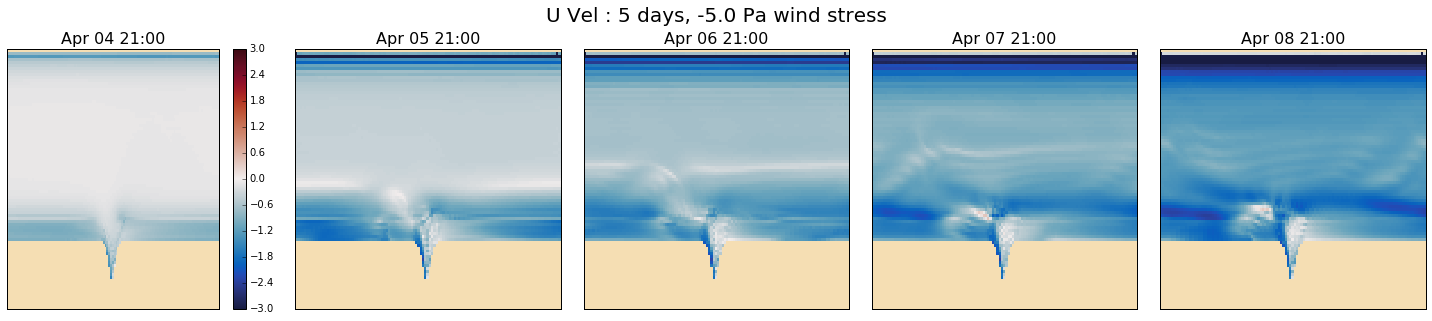

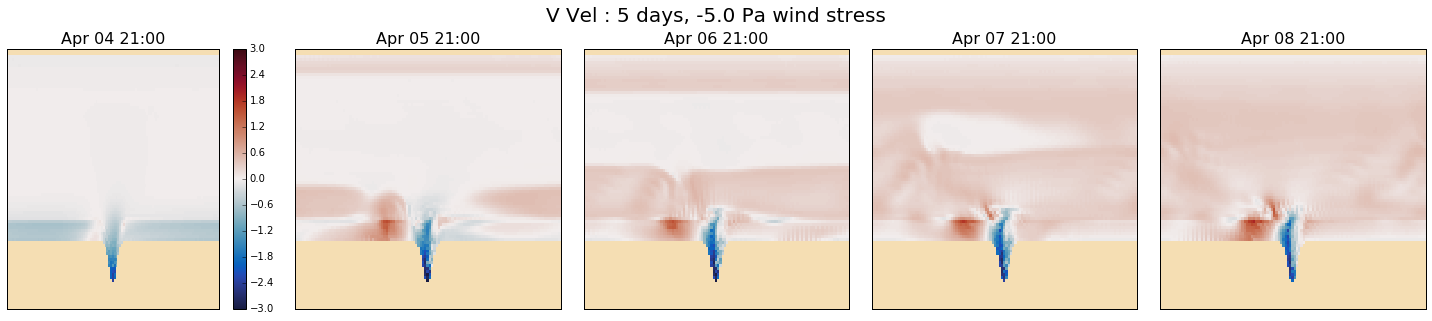

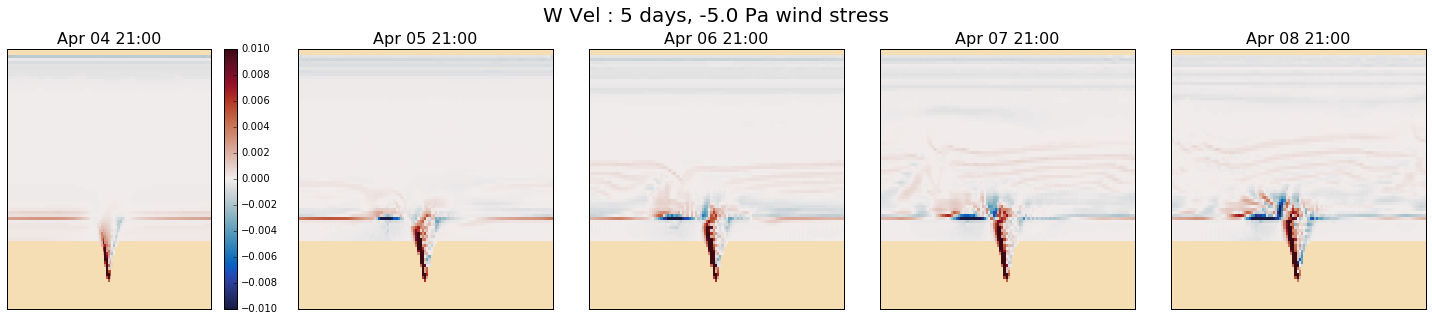

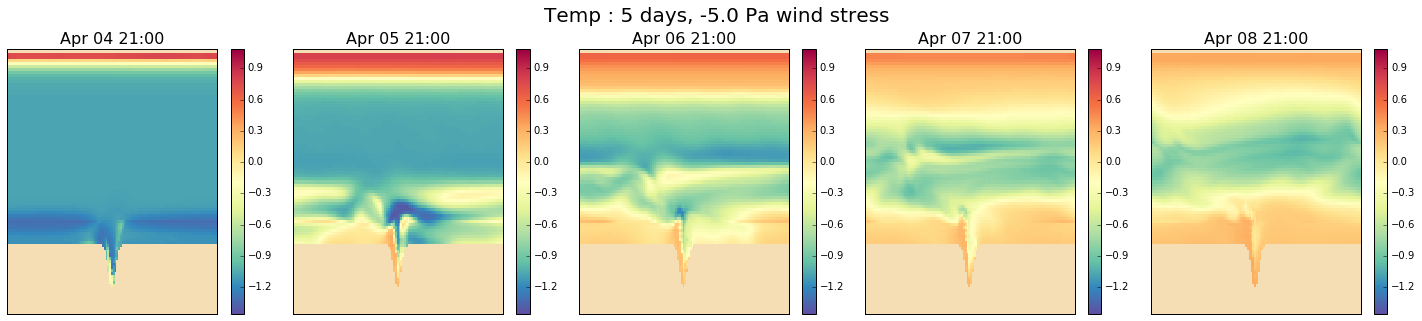

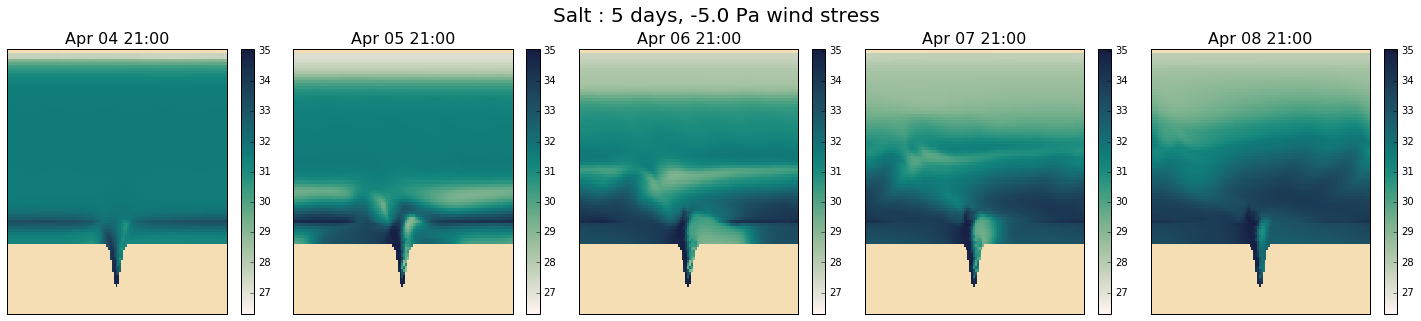

In [16]:
dep = 6; supttl = ' : 5 days, -5.0 Pa wind stress'
print(gridT_15['deptht'][:][dep])
time_inds = [3,7,11,15,19]
fig = plot_gyre_times(gridT_15, U_15, dep, time_inds, 3.0, cmo.cm.balance, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_15, V_15, dep, time_inds, 3.0, cmo.cm.balance, True, 'V Vel'+supttl)
fig = plot_gyre_times(gridT_15, W_15, dep, time_inds, 0.01, cmo.cm.balance, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_15, tem_15, dep, time_inds, None, cm.Spectral_r, 'tem', 'Temp'+supttl)
fig = plot_gyre_times(gridT_15, sal_15, dep, time_inds, None, cmo.cm.tempo, 'sal', 'Salt'+supttl)

# Run16 (Ideal) and Run17 (Real): Low Wind Stress (-0.1 Pa)

## A. Below shelf

74.9393


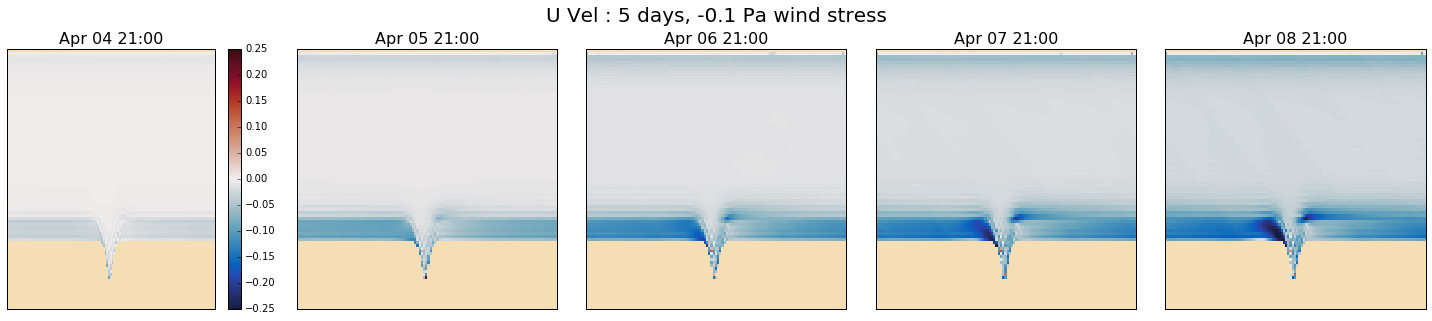

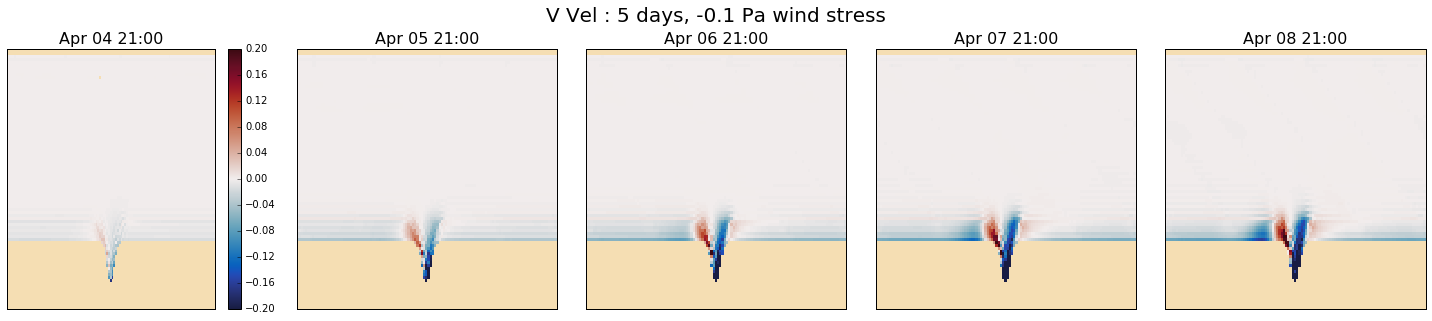

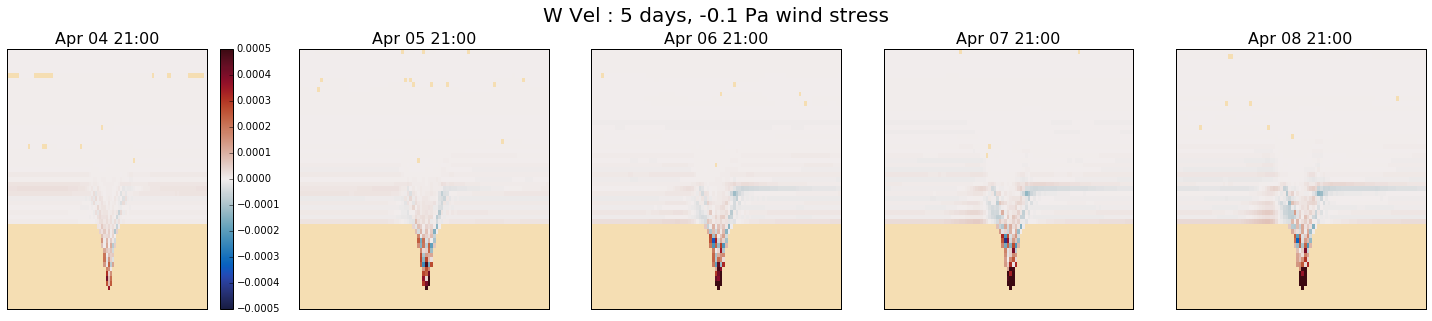

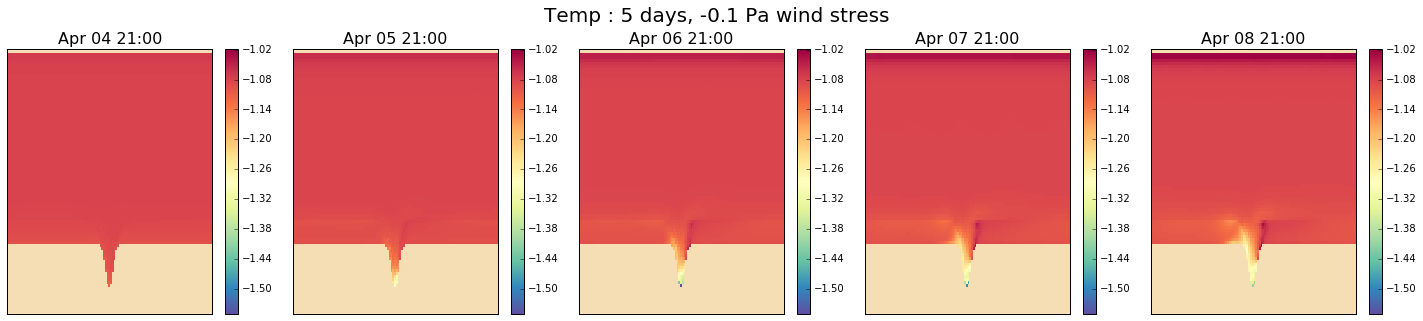

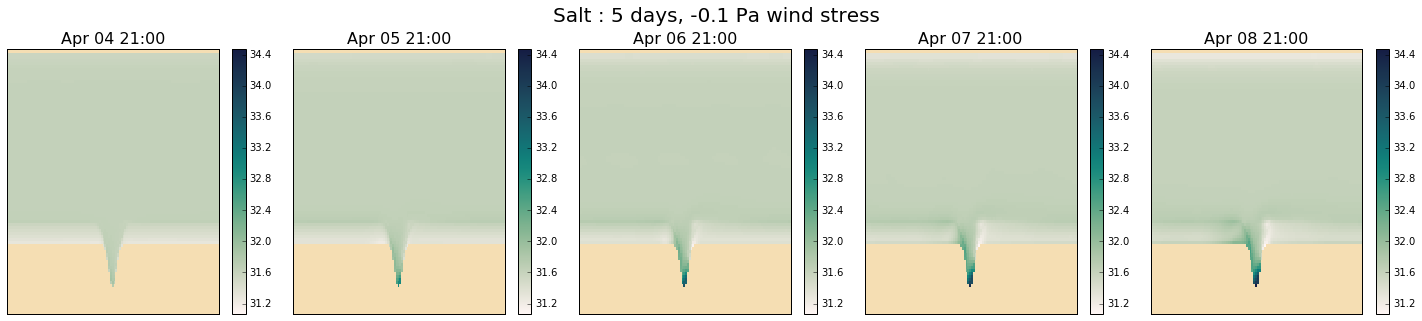

In [17]:
dep = 6; supttl = ' : 5 days, -0.1 Pa wind stress'
print(gridT_16['deptht'][:][dep])
time_inds = [3,7,11,15,19]
fig = plot_gyre_times(gridT_16, U_16, dep, time_inds, 0.25, cmo.cm.balance, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_16, V_16, dep, time_inds, 0.20, cmo.cm.balance, True, 'V Vel'+supttl)
fig = plot_gyre_times(gridT_16, W_16[:,:,5:60,10:105], dep, time_inds, 0.0005, cmo.cm.balance, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_16, tem_16, dep, time_inds, None, cm.Spectral_r, 'tem', 'Temp'+supttl)
fig = plot_gyre_times(gridT_16, sal_16, dep, time_inds, None, cmo.cm.tempo, 'sal', 'Salt'+supttl)

* look at prepare_stratification. since at maxima, could be warm water coming up from below or down from above, but because water is increasing in salinity, then that can means that it's coming up because the strat shows increasing salt with depth.

74.9393


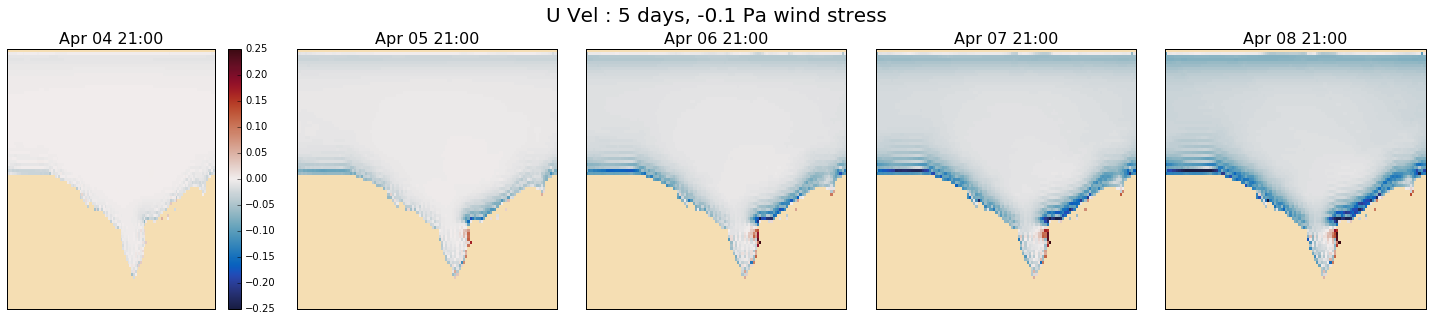

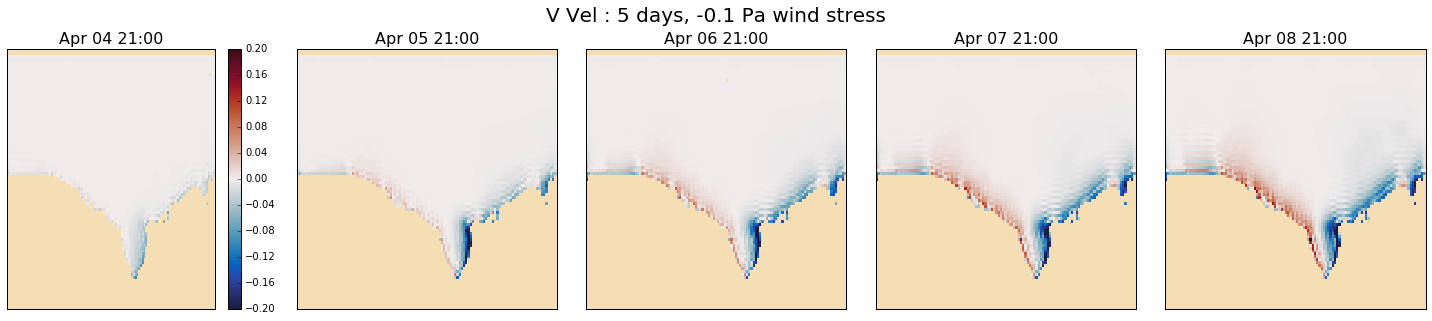

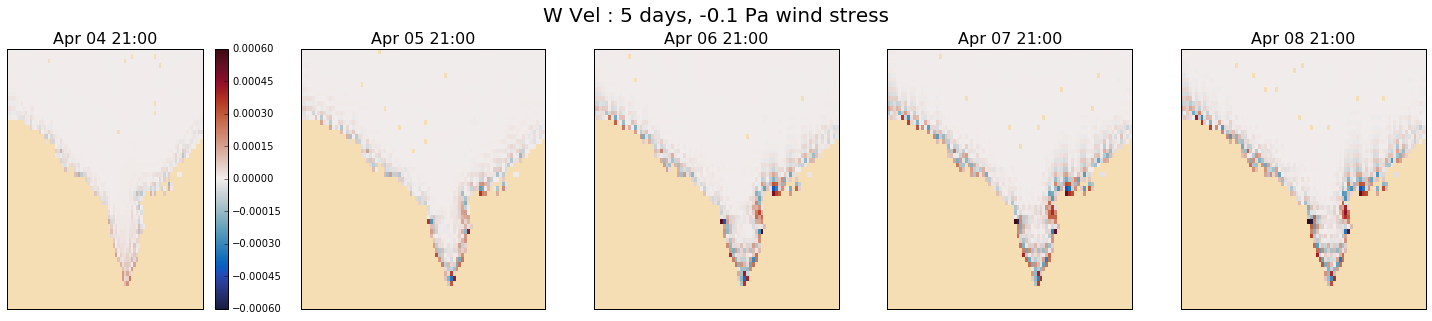

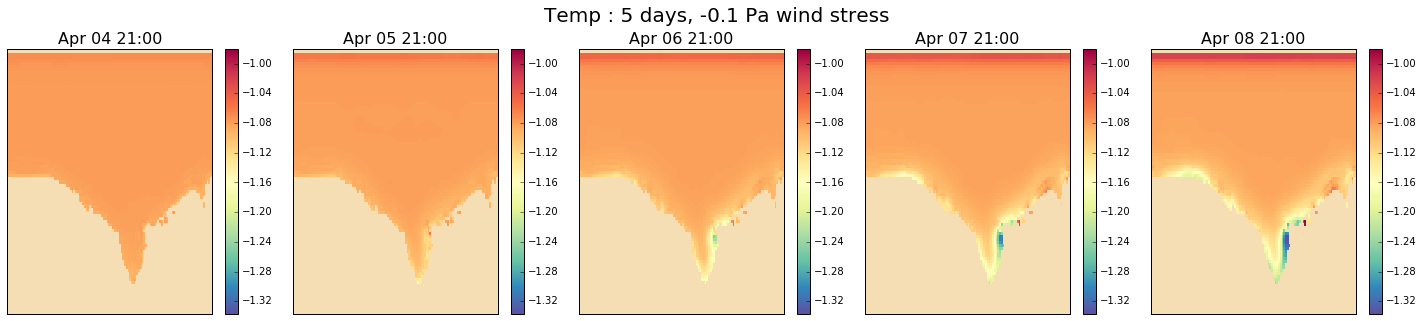

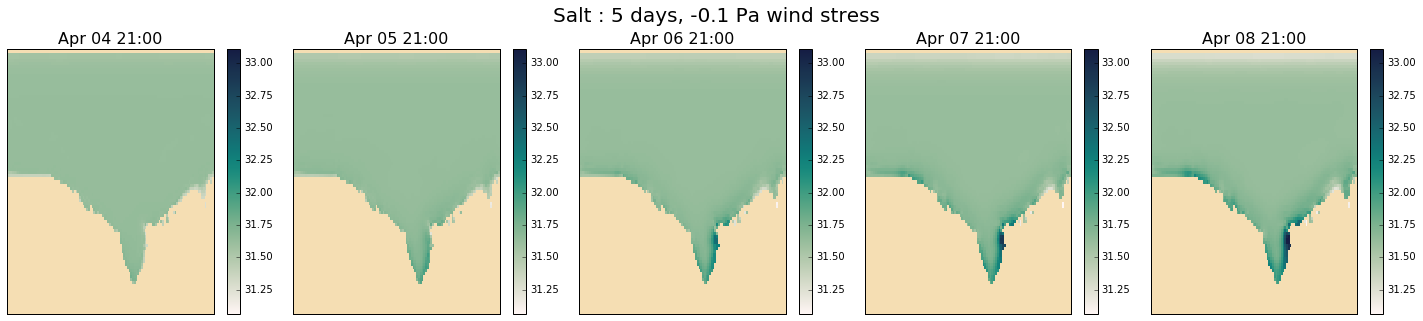

In [18]:
dep = 6; supttl = ' : 5 days, -0.1 Pa wind stress'
print(gridT_17['deptht'][:][dep])
time_inds = [3,7,11,15,19]
fig = plot_gyre_times(gridT_17, U_17, dep, time_inds, 0.25, cmo.cm.balance, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_17, V_17, dep, time_inds, 0.20, cmo.cm.balance, True, 'V Vel'+supttl)
fig = plot_gyre_times(gridT_17, W_17[:,:,5:60,20:105], dep, time_inds, 0.0006, cmo.cm.balance, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_17, tem_17, dep, time_inds, None, cm.Spectral_r, 'tem', 'Temp'+supttl)
fig = plot_gyre_times(gridT_17, sal_17, dep, time_inds, None, cmo.cm.tempo, 'sal', 'Salt'+supttl)

## At the surface

4.97527


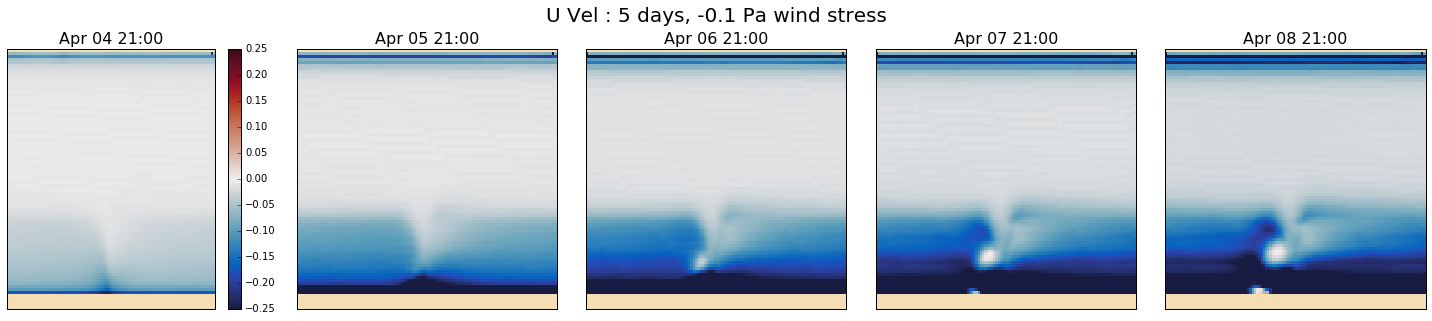

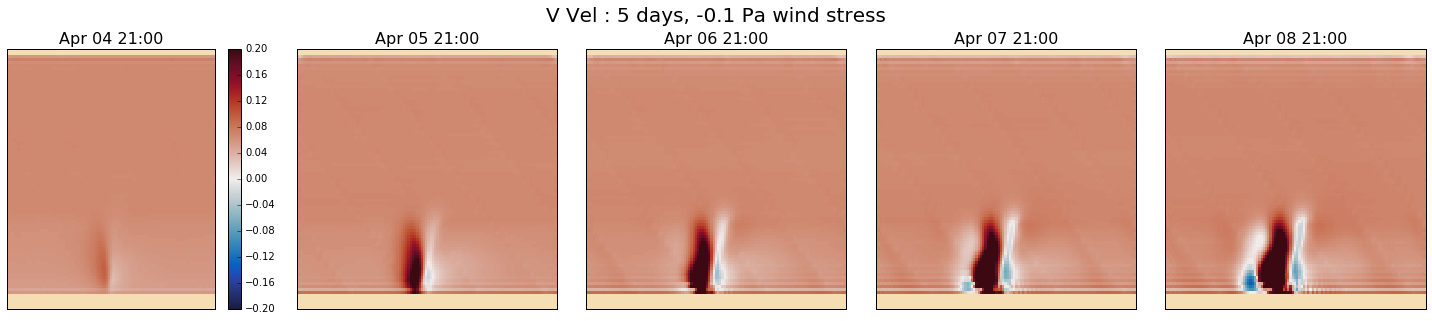

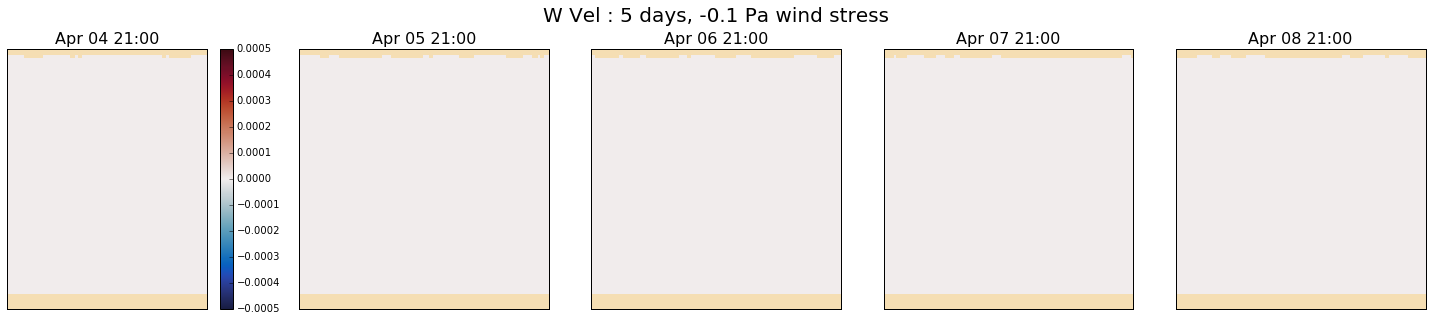

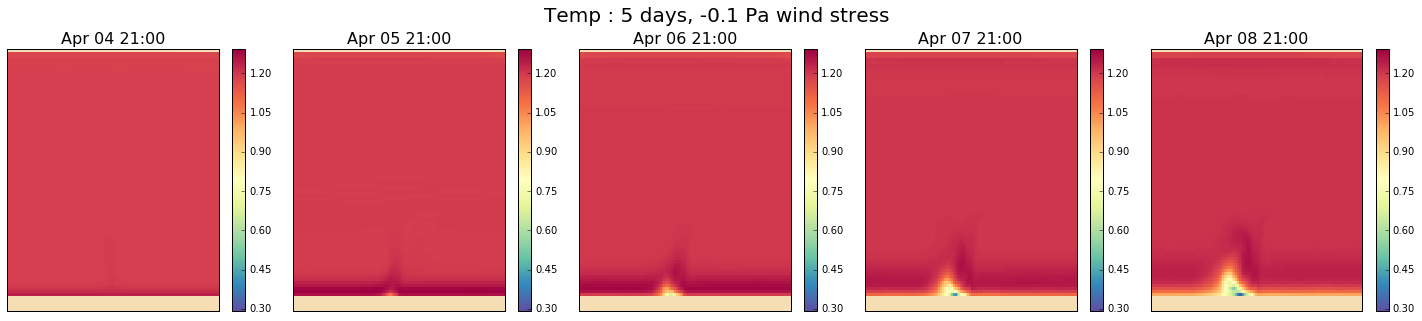

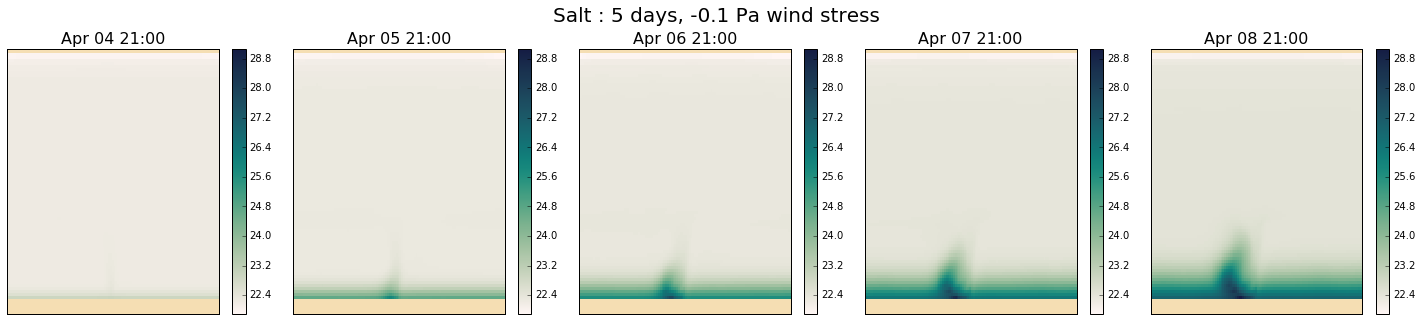

In [19]:
dep = 0; supttl = ' : 5 days, -0.1 Pa wind stress'
print(gridT_16['deptht'][:][dep])
time_inds = [3,7,11,15,19]
fig = plot_gyre_times(gridT_16, U_16, dep, time_inds, 0.25, cmo.cm.balance, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_16, V_16, dep, time_inds, 0.20, cmo.cm.balance, True, 'V Vel'+supttl)
fig = plot_gyre_times(gridT_16, W_16, dep, time_inds, 0.0005, cmo.cm.balance, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_16, tem_16, dep, time_inds, None, cm.Spectral_r, 'tem', 'Temp'+supttl)
fig = plot_gyre_times(gridT_16, sal_16, dep, time_inds, None, cmo.cm.tempo, 'sal', 'Salt'+supttl)

* look at depth 2 and 0 and it shows upwelling at head

4.97527


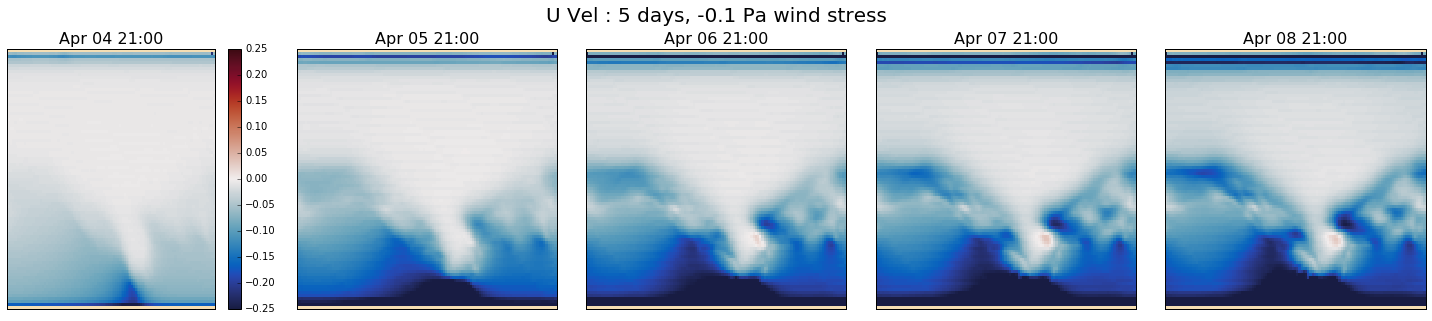

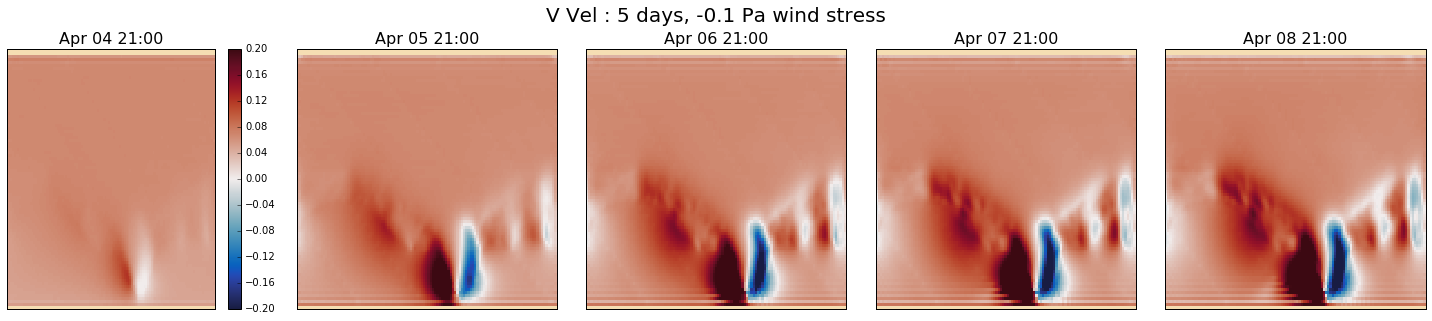

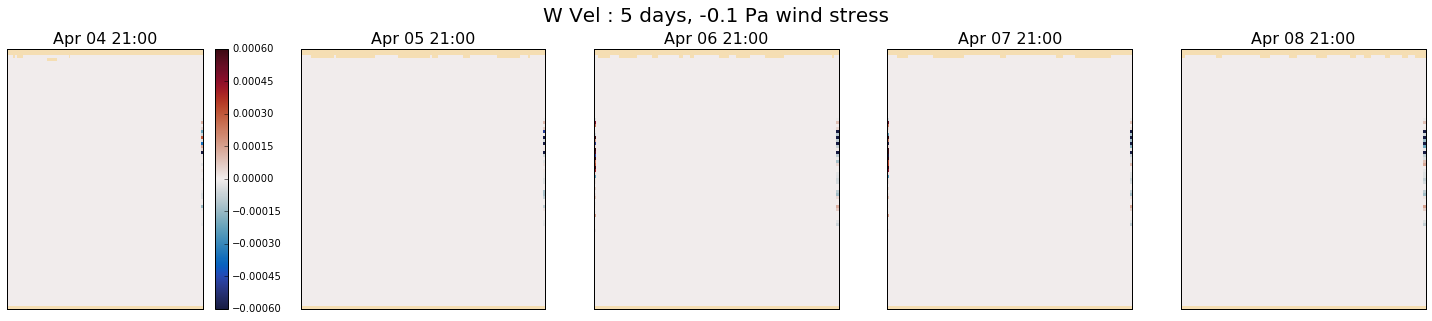

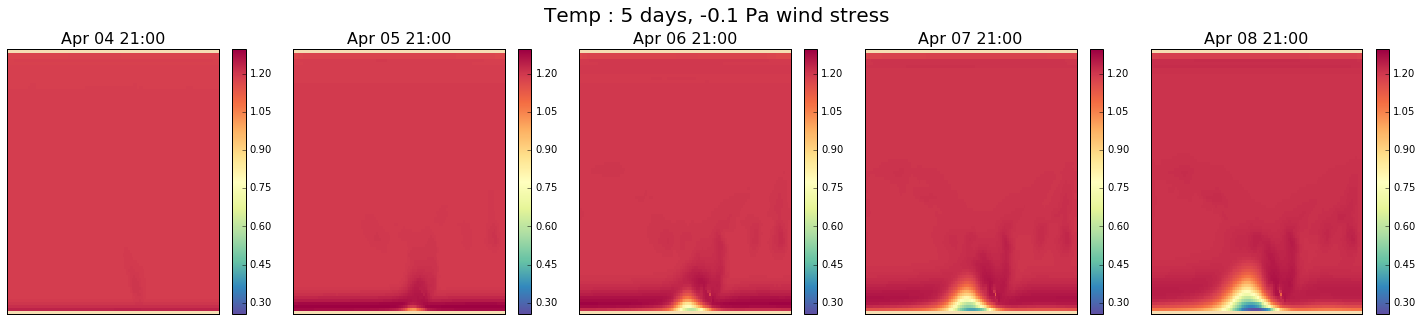

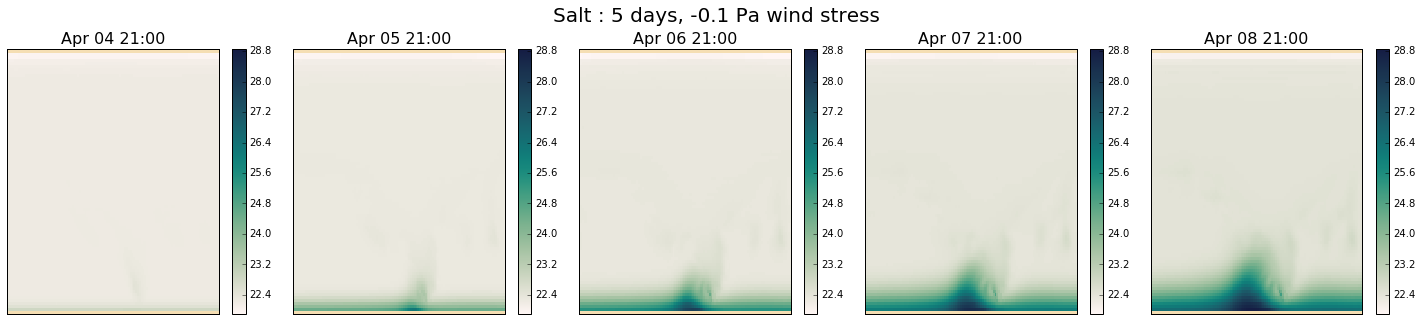

In [20]:
dep = 0; supttl = ' : 5 days, -0.1 Pa wind stress'
print(gridT_17['deptht'][:][dep])
time_inds = [3,7,11,15,19]
fig = plot_gyre_times(gridT_17, U_17, dep, time_inds, 0.25, cmo.cm.balance, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_17, V_17, dep, time_inds, 0.20, cmo.cm.balance, True, 'V Vel'+supttl)
fig = plot_gyre_times(gridT_17, W_17, dep, time_inds, 0.0006, cmo.cm.balance, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_17, tem_17, dep, time_inds, None, cm.Spectral_r, 'tem', 'Temp'+supttl)
fig = plot_gyre_times(gridT_17, sal_17, dep, time_inds, None, cmo.cm.tempo, 'sal', 'Salt'+supttl)

# Run18 (Ideal) and Run19 (Real): Halved timestep

Ideal - Changes in U concentrated at N boundary. Changes in W are super small. I checked changes in temp and sal especially because I didn't have to worry about negative subtractions for these. Temp and sal changes also mostly along N boundary. There is also only a spec of lower temp at ts=19 for temp at the head of the canyon. Eyeballing it shows warmer and saltier water at the N boundary, but these differences are so small.

74.9393


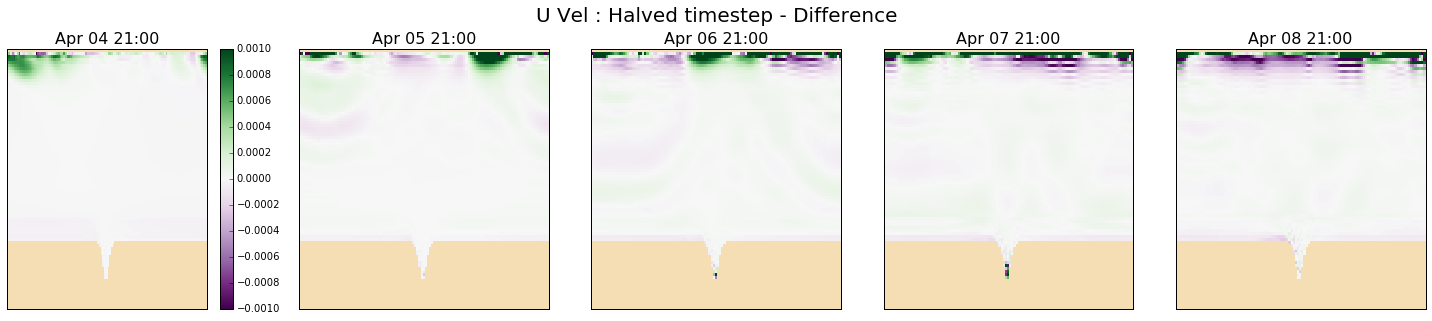

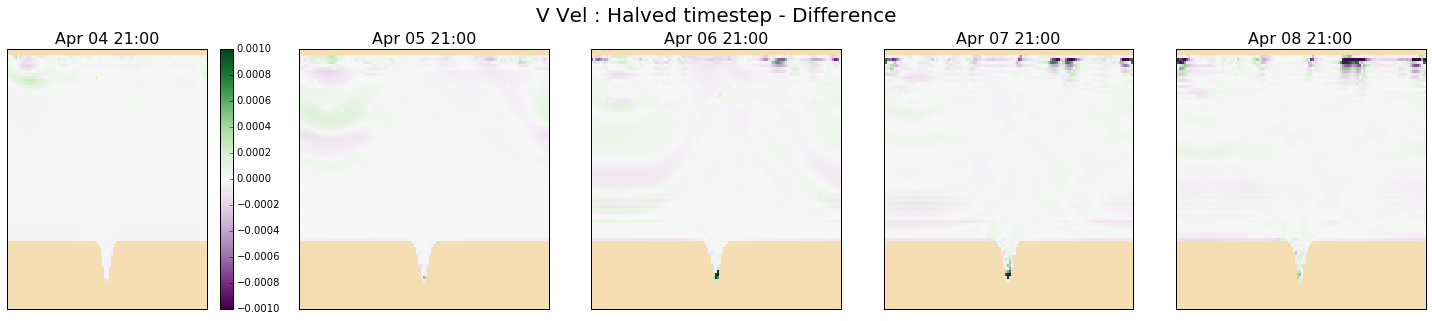

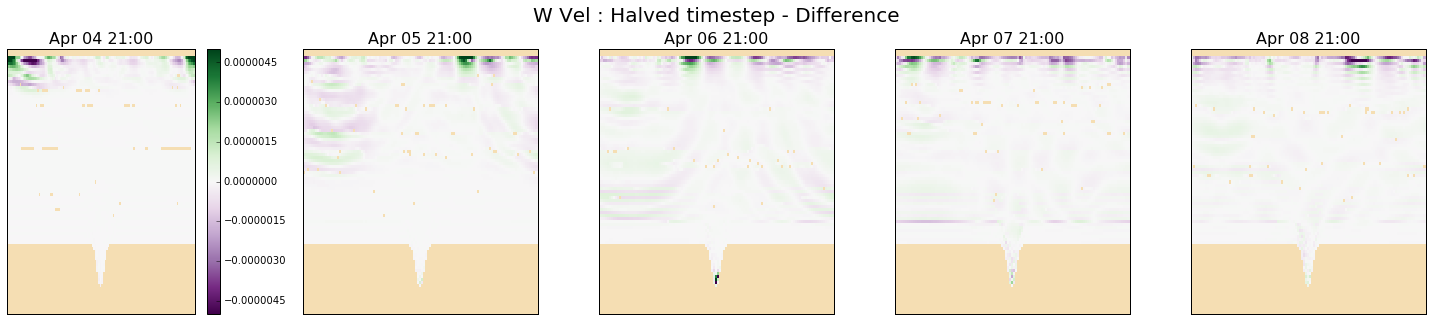

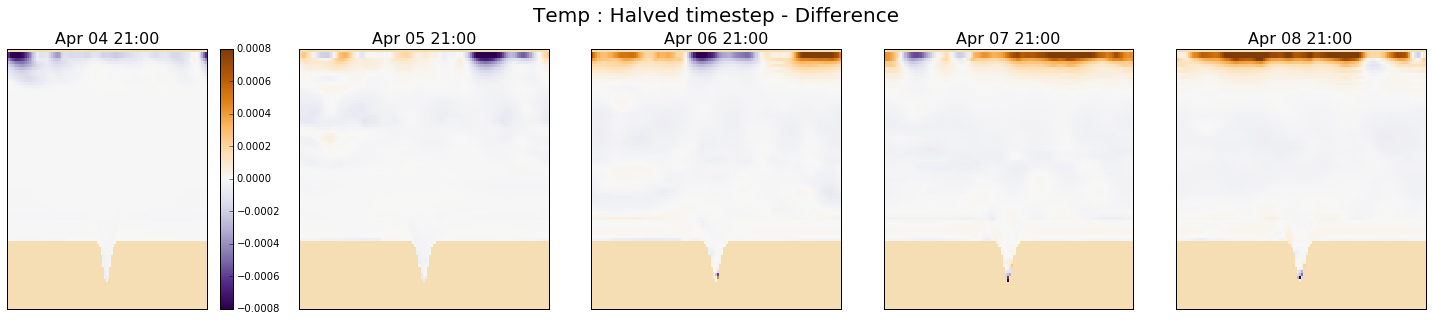

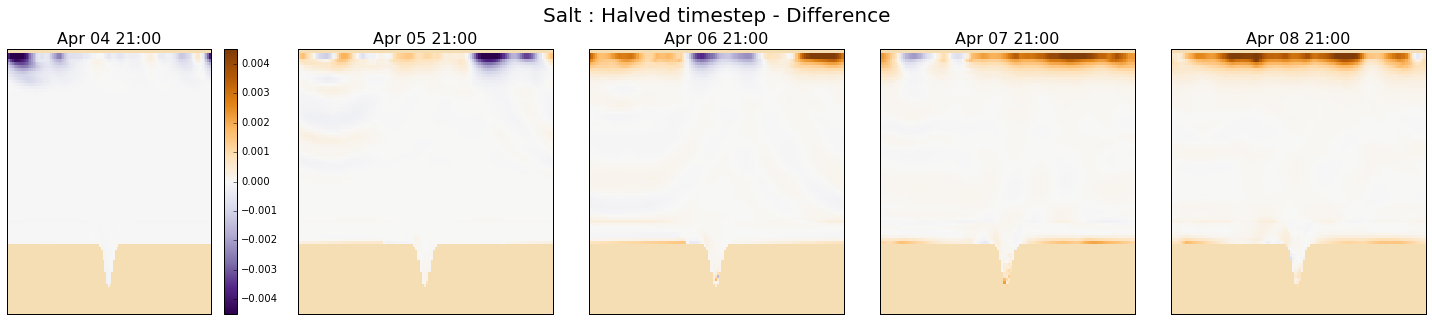

In [21]:
dep = 6; supttl = ' : Halved timestep - Difference'
print(gridT_18['deptht'][:][dep])
time_inds = [3,7,11,15,19]
fig = plot_gyre_times(gridT_18, ab_sub(U_18,U_16), dep, time_inds, 0.001, cm.PRGn, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_18, ab_sub(V_18,V_16), dep, time_inds, 0.001, cm.PRGn, True, 'V Vel'+supttl)
fig = plot_gyre_times(gridT_18, ab_sub(W_18,W_16), dep, time_inds, 0.000005, cm.PRGn, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_18, ab_sub(tem_18,tem_16), dep, time_inds, 0.0008, cm.PuOr_r, True, 'Temp'+supttl)
fig = plot_gyre_times(gridT_18, ab_sub(sal_18,sal_16), dep, time_inds, 0.0045, cm.PuOr_r, True, 'Salt'+supttl)

Real - Again, most changes are on N wall. The changes compared to the ideal are similar - those in V are smaller than in U, those in W are really small, and warmer colder water by a tiny bit along N wall. Temp shows lower temperatures at a point along the coast, and slightly higher in the canyon. 

74.9393


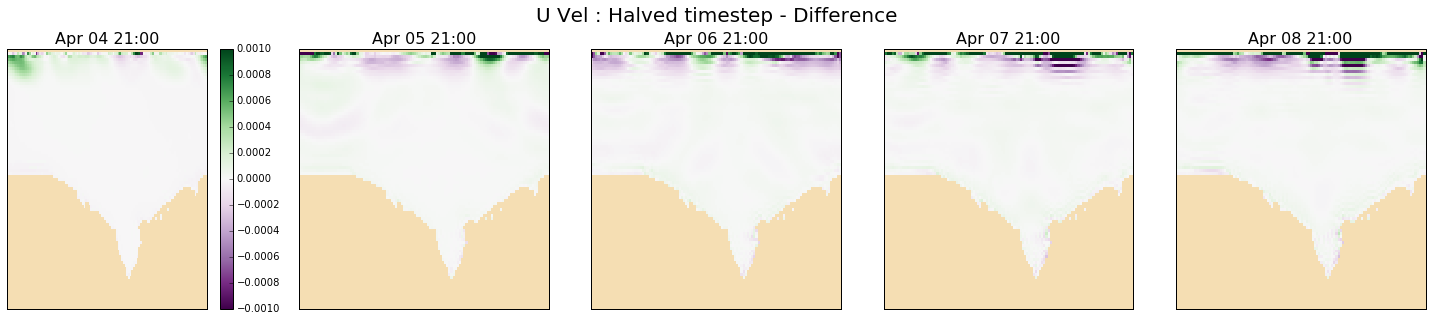

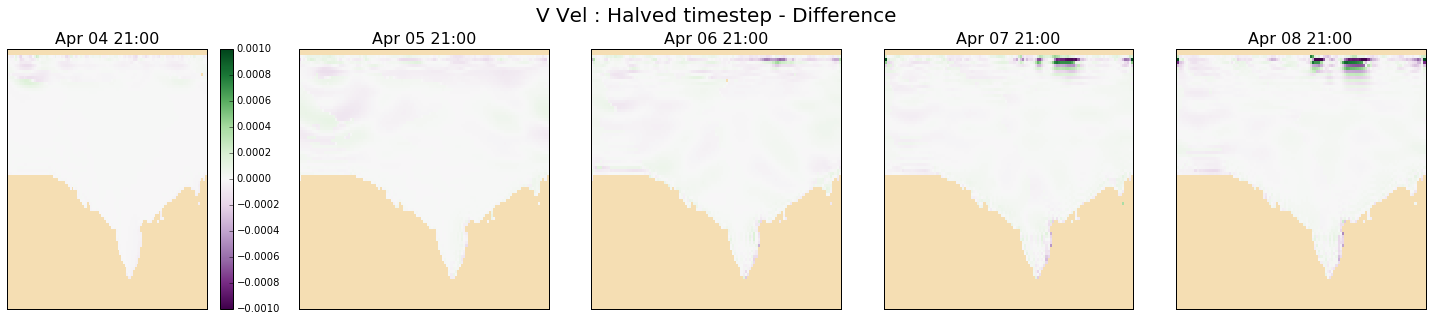

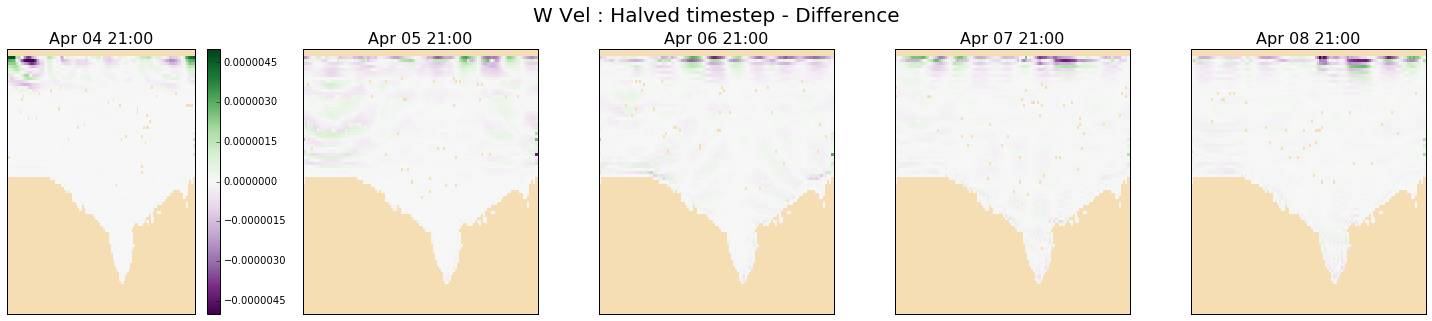

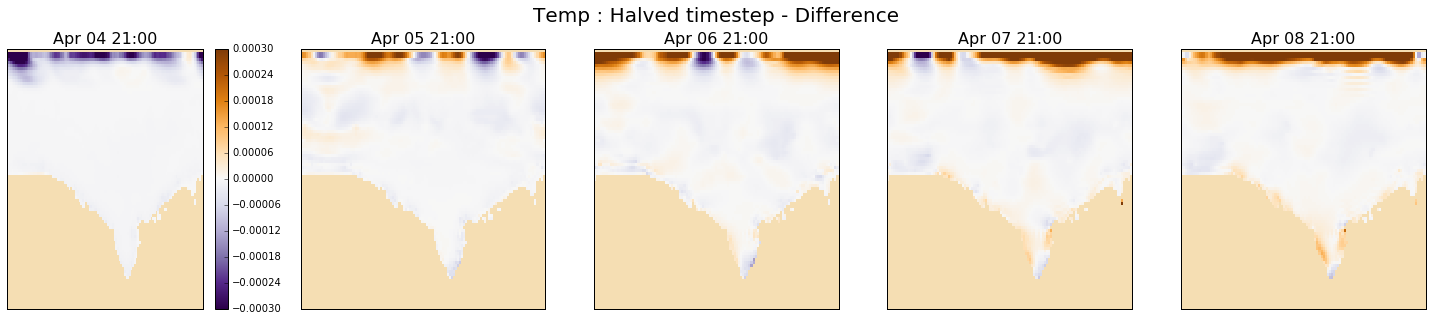

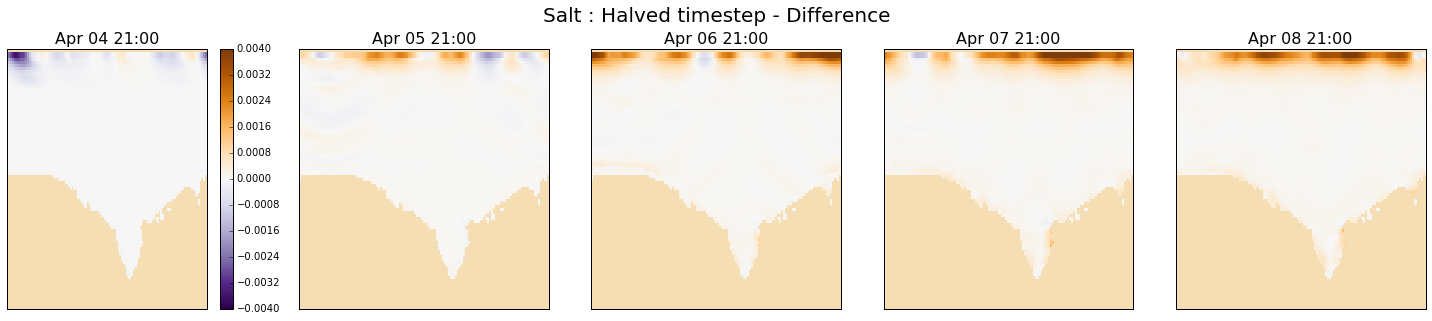

In [22]:
dep = 6; supttl = ' : Halved timestep - Difference'
print(gridT_19['deptht'][:][dep])
time_inds = [3,7,11,15,19]
fig = plot_gyre_times(gridT_19, ab_sub(U_19,U_17), dep, time_inds, 0.001, cm.PRGn, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_19, ab_sub(V_19,V_17), dep, time_inds, 0.001, cm.PRGn, True, 'V Vel'+supttl)
fig = plot_gyre_times(gridT_19, ab_sub(W_19,W_17), dep, time_inds, 0.000005, cm.PRGn, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_19, ab_sub(tem_19,tem_17), dep, time_inds, 0.0003, cm.PuOr_r, True, 'Temp'+supttl)
fig = plot_gyre_times(gridT_19, ab_sub(sal_19,sal_17), dep, time_inds, 0.004, cm.PuOr_r, True, 'Salt'+supttl)

# Run20 (Ideal) and Run21 (Real): Higher viscosity [250 m2/s]

74.9393


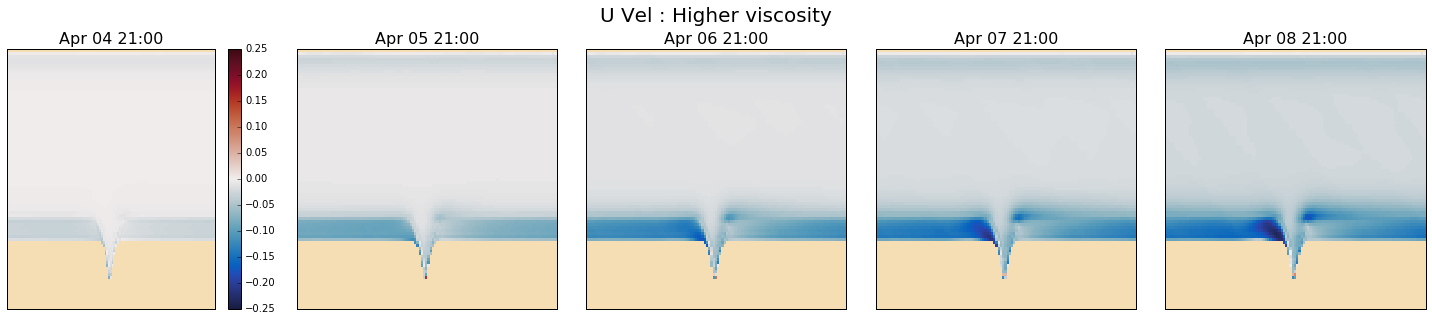

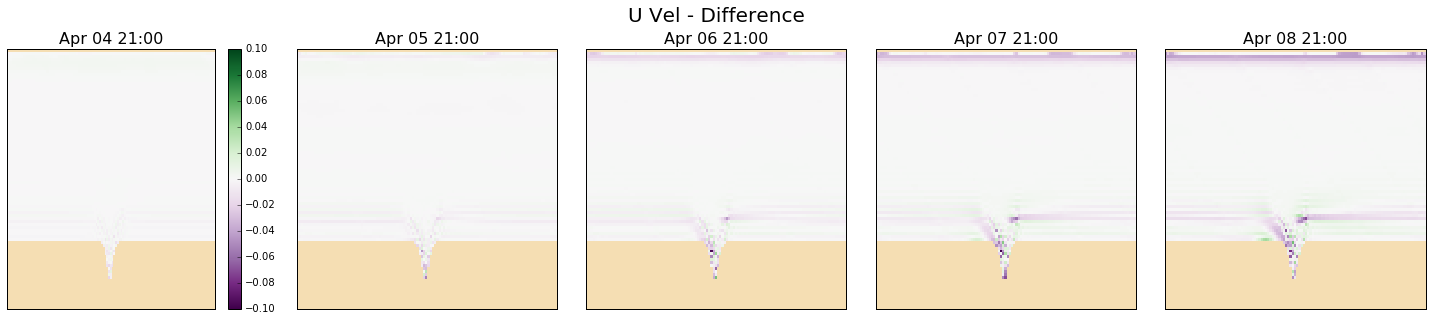

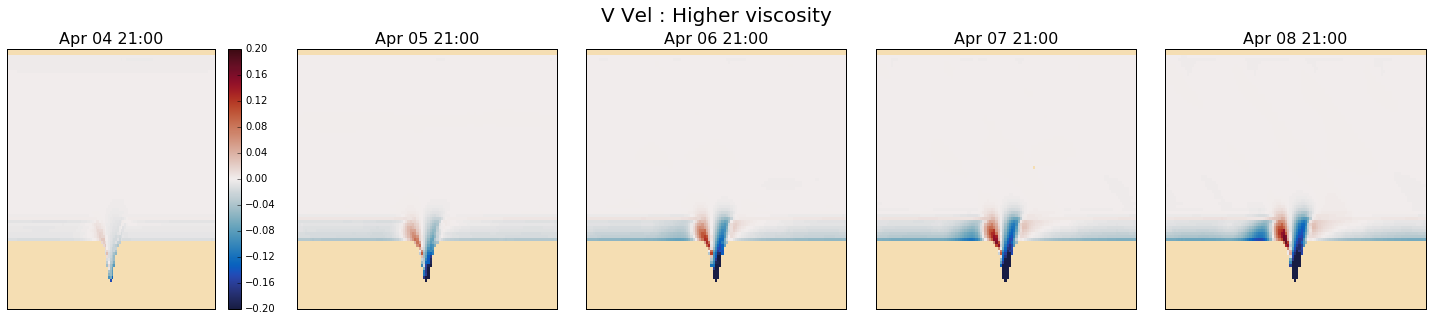

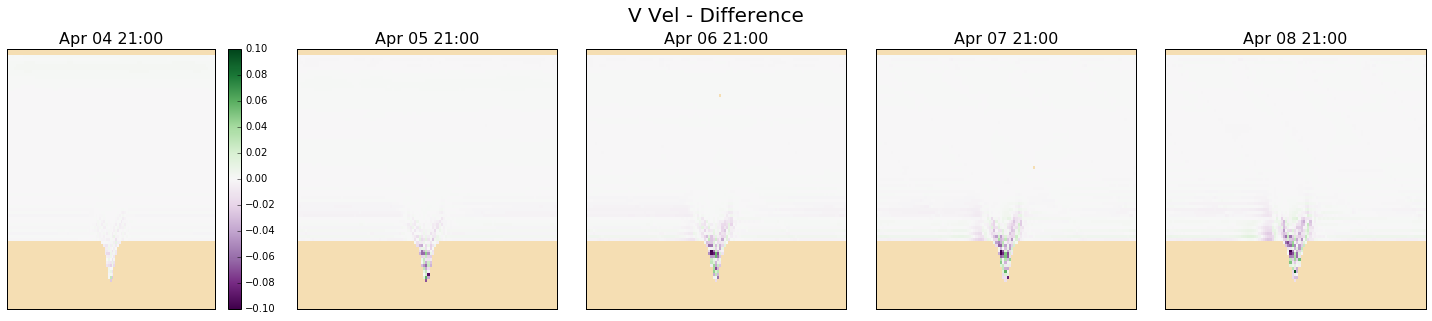

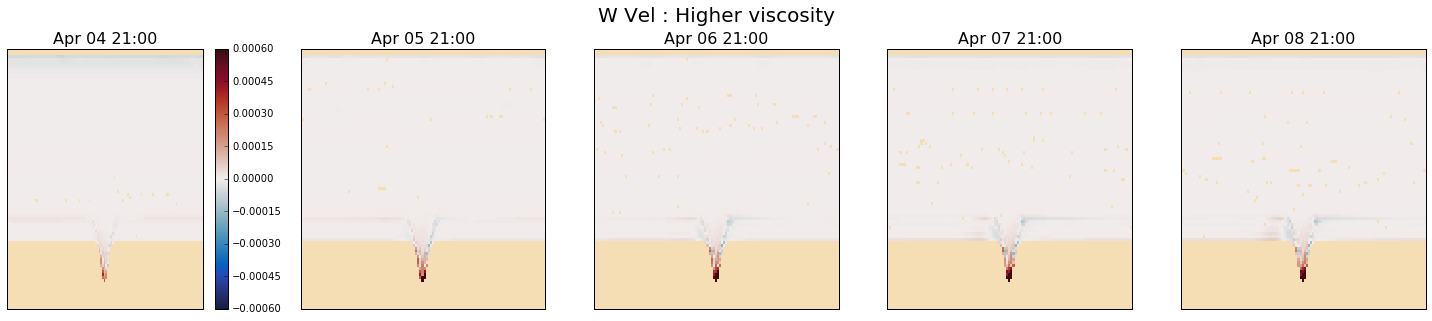

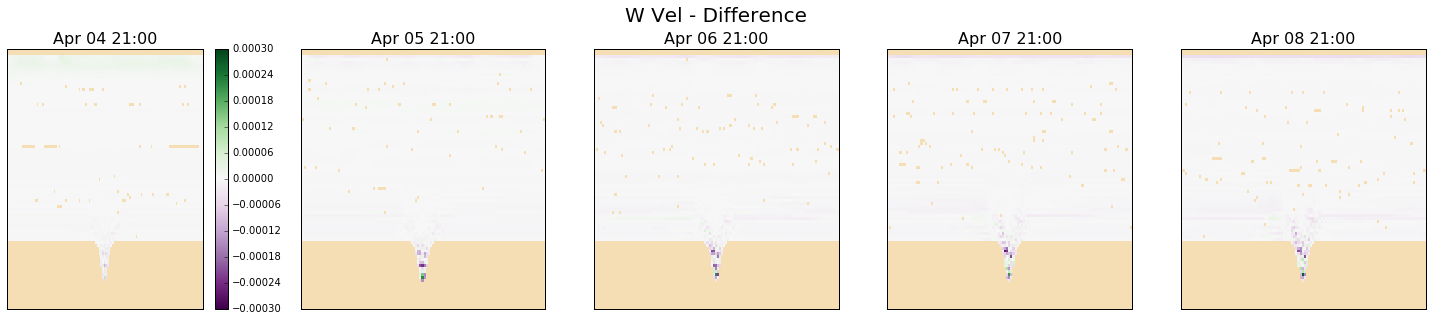

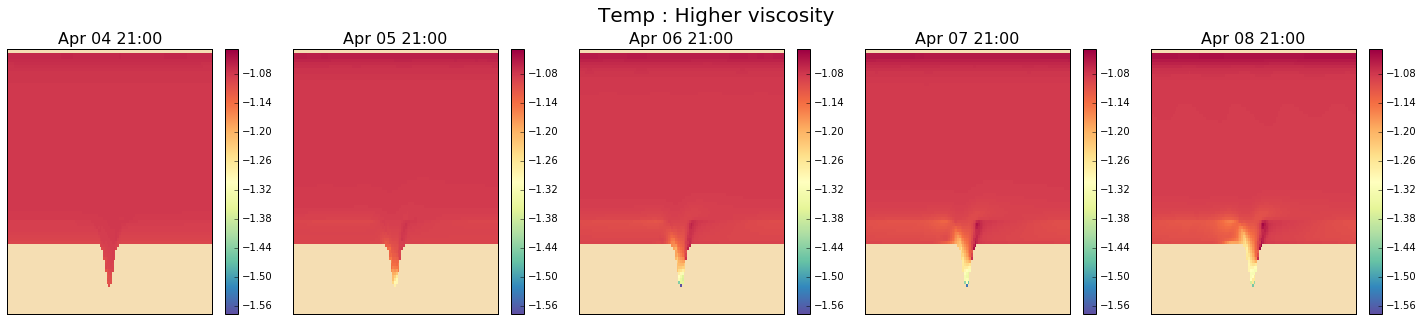

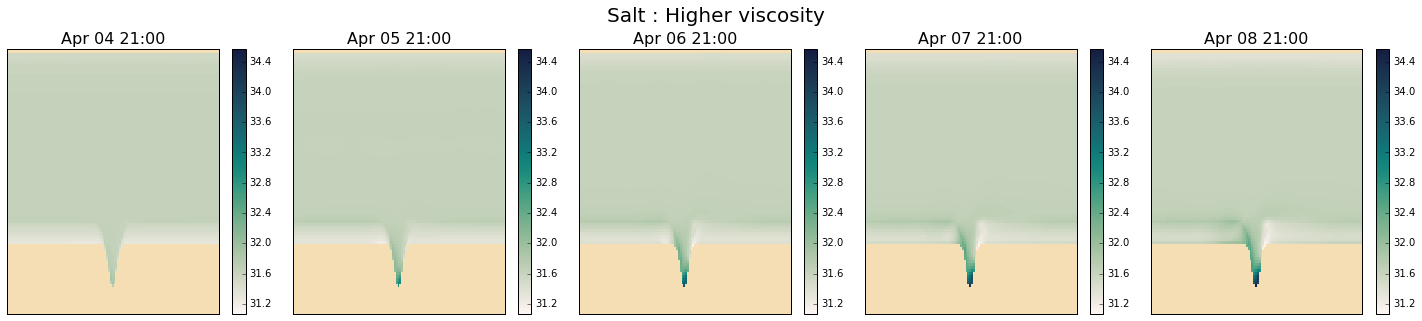

In [23]:
dep = 6; supttl = ' : Higher viscosity'; dttl = ' - Difference'
print(gridT_20['deptht'][:][dep])
time_inds = [3,7,11,15,19]
fig = plot_gyre_times(gridT_20, U_20, dep, time_inds, 0.25, cmo.cm.balance, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_20, ab_sub(U_20,U_18), dep, time_inds, 0.1, cm.PRGn, True, 'U Vel'+dttl)

fig = plot_gyre_times(gridT_20, V_20, dep, time_inds, 0.20, cmo.cm.balance, True, 'V Vel'+supttl)
fig = plot_gyre_times(gridT_20, ab_sub(V_20,V_18), dep, time_inds, 0.1, cm.PRGn, True, 'V Vel'+dttl)

fig = plot_gyre_times(gridT_20, W_20, dep, time_inds, 0.0006, cmo.cm.balance, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_20, ab_sub(W_20,W_18), dep, time_inds, 0.0003, cm.PRGn, True, 'W Vel'+dttl)

fig = plot_gyre_times(gridT_20, tem_20, dep, time_inds, None, cm.Spectral_r, 'tem', 'Temp'+supttl)
fig = plot_gyre_times(gridT_20, sal_20, dep, time_inds, None, cmo.cm.tempo, 'sal', 'Salt'+supttl)

74.9393


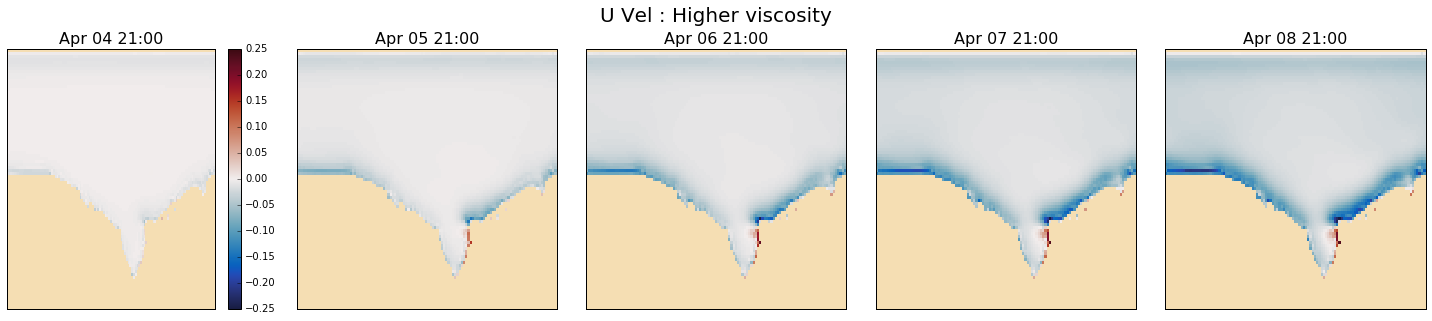

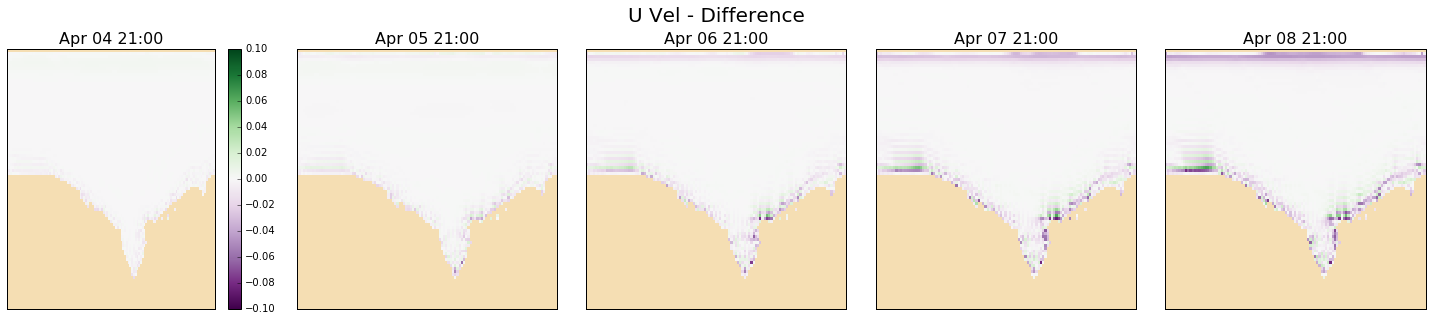

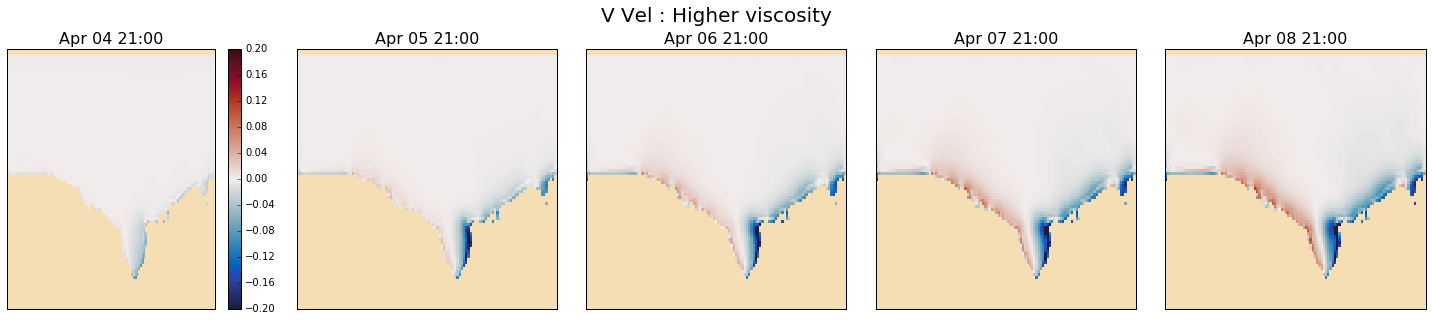

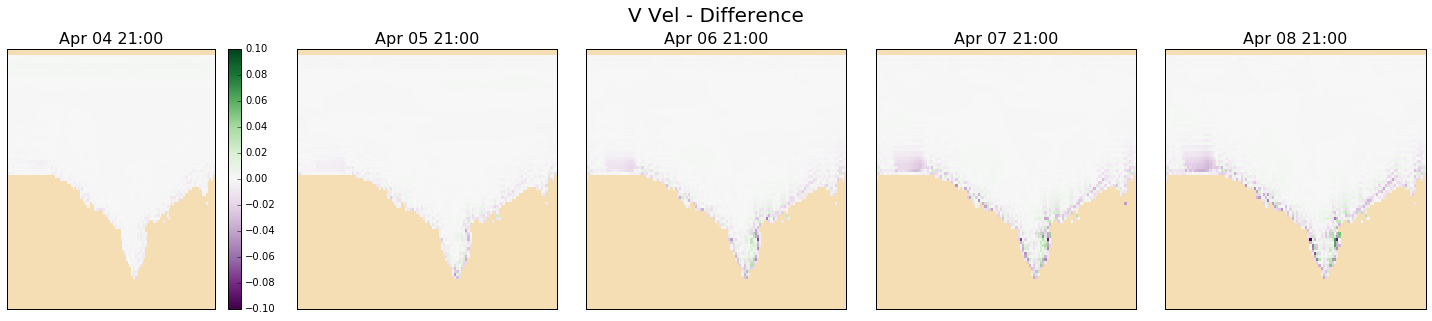

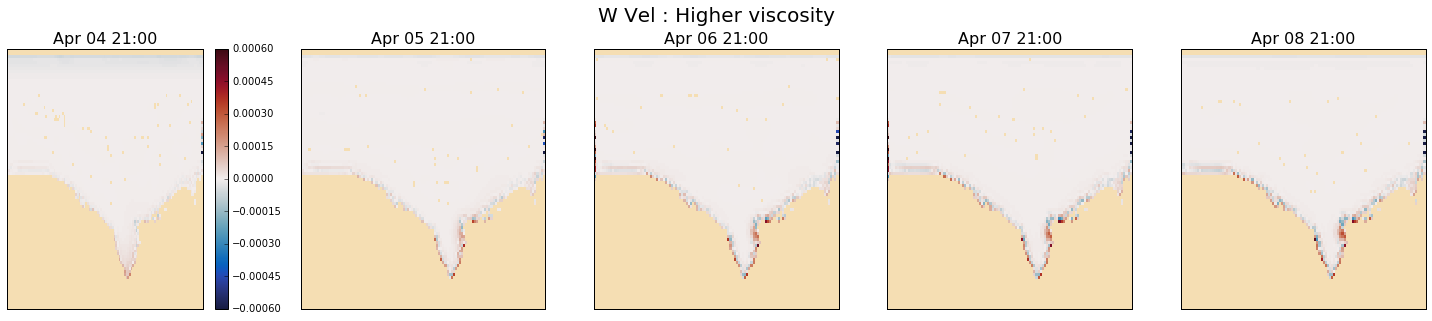

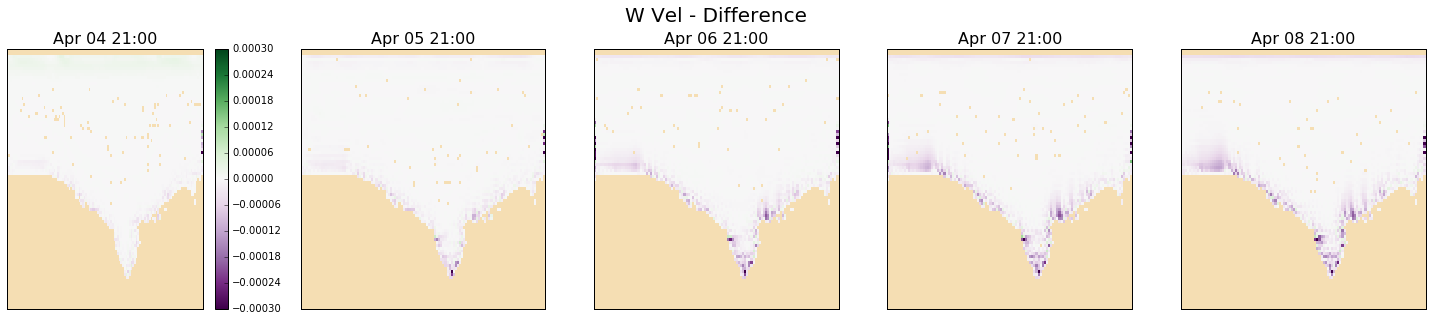

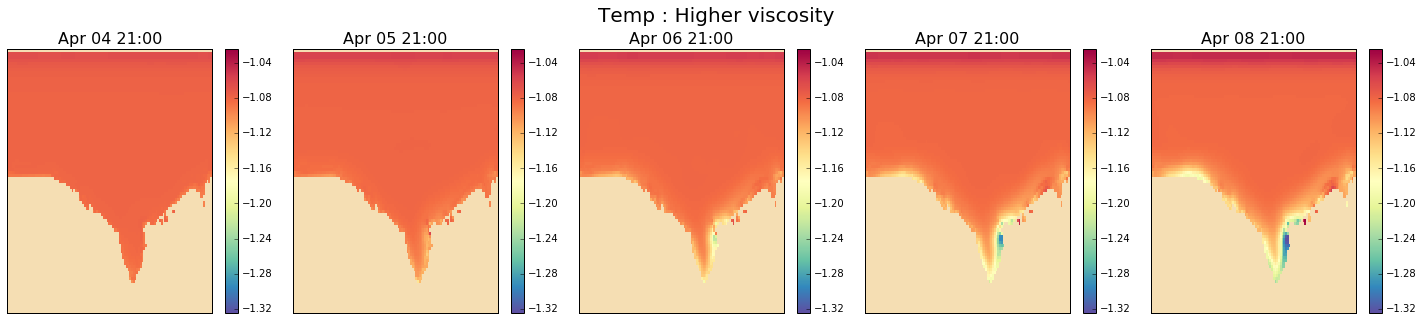

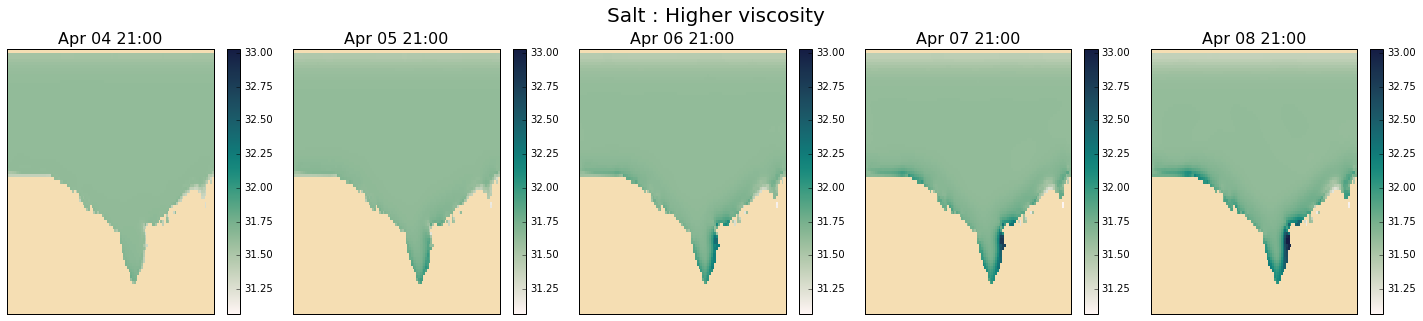

In [24]:
dep = 6; supttl = ' : Higher viscosity'
print(gridT_21['deptht'][:][dep])
time_inds = [3,7,11,15,19]
fig = plot_gyre_times(gridT_21, U_21, dep, time_inds, 0.25, cmo.cm.balance, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_21, ab_sub(U_21,U_19), dep, time_inds, 0.1, cm.PRGn, True, 'U Vel'+dttl)

fig = plot_gyre_times(gridT_21, V_21, dep, time_inds, 0.20, cmo.cm.balance, True, 'V Vel'+supttl)
fig = plot_gyre_times(gridT_21, ab_sub(V_21,V_19), dep, time_inds, 0.1, cm.PRGn, True, 'V Vel'+dttl)

fig = plot_gyre_times(gridT_21, W_21, dep, time_inds, 0.0006, cmo.cm.balance, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_21, ab_sub(W_21,W_19), dep, time_inds, 0.0003, cm.PRGn, True, 'W Vel'+dttl)

fig = plot_gyre_times(gridT_21, tem_21, dep, time_inds, None, cm.Spectral_r, 'tem', 'Temp'+supttl)
fig = plot_gyre_times(gridT_21, sal_21, dep, time_inds, None, cmo.cm.tempo, 'sal', 'Salt'+supttl)

# Run22 (Ideal) and Run23 (Real): Even higher viscosity [500 m2/s]

74.9393 111.224


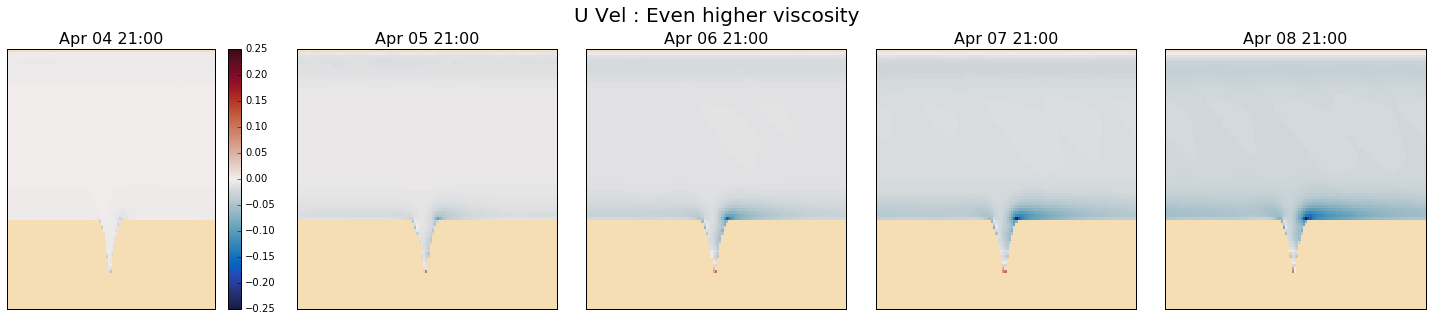

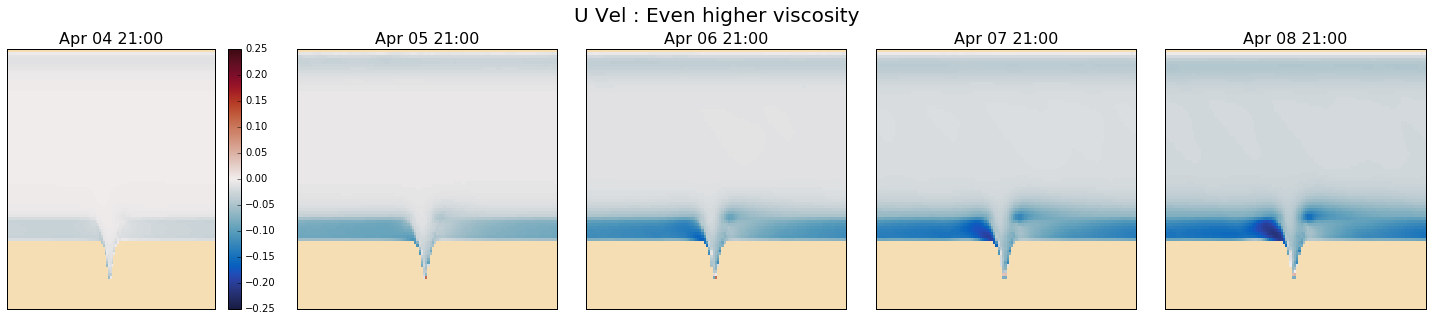

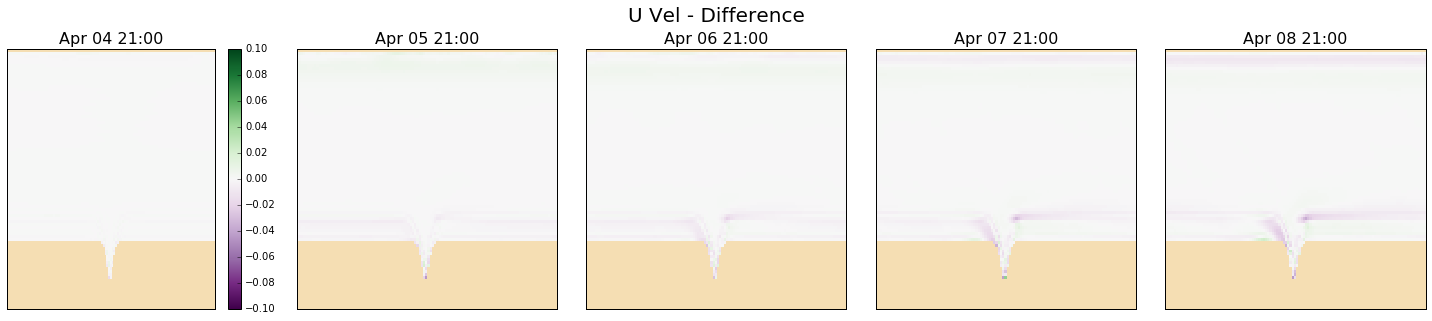

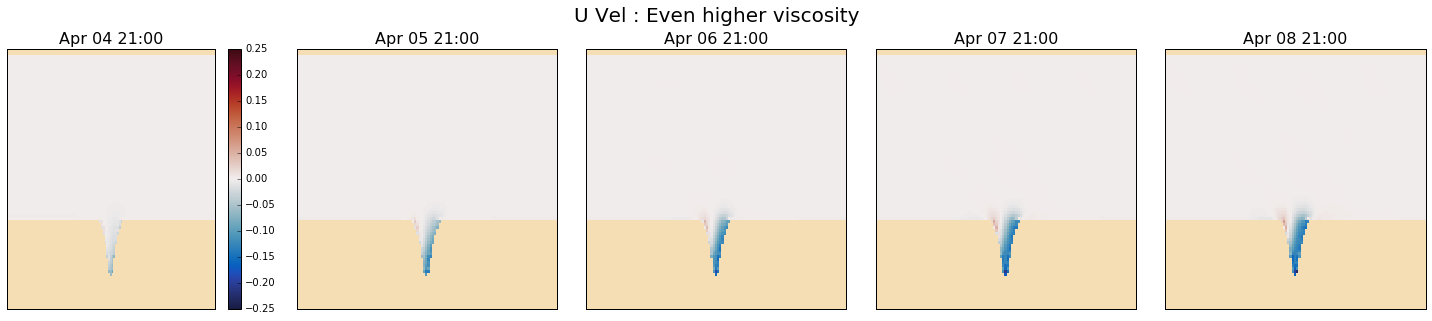

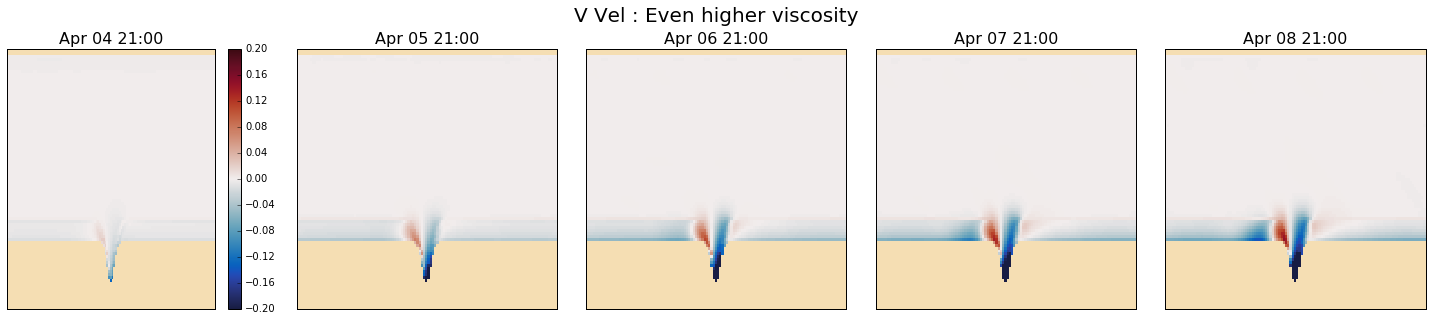

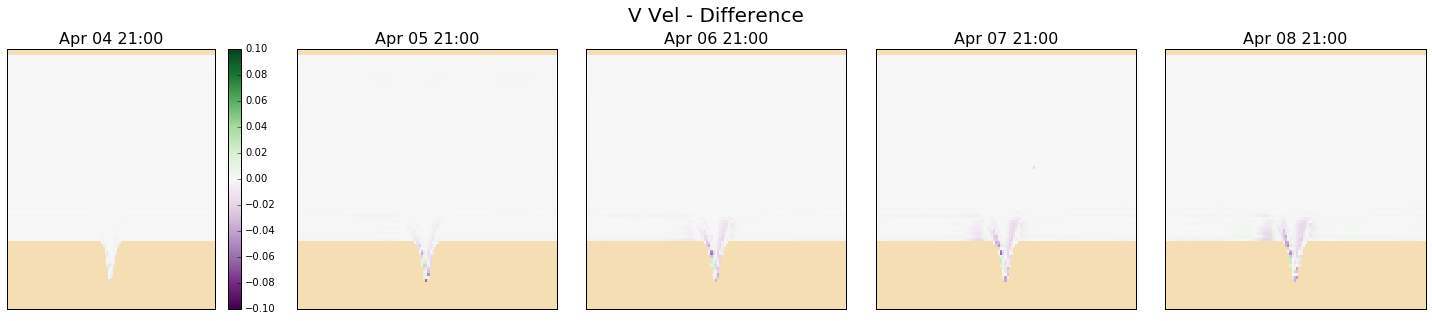

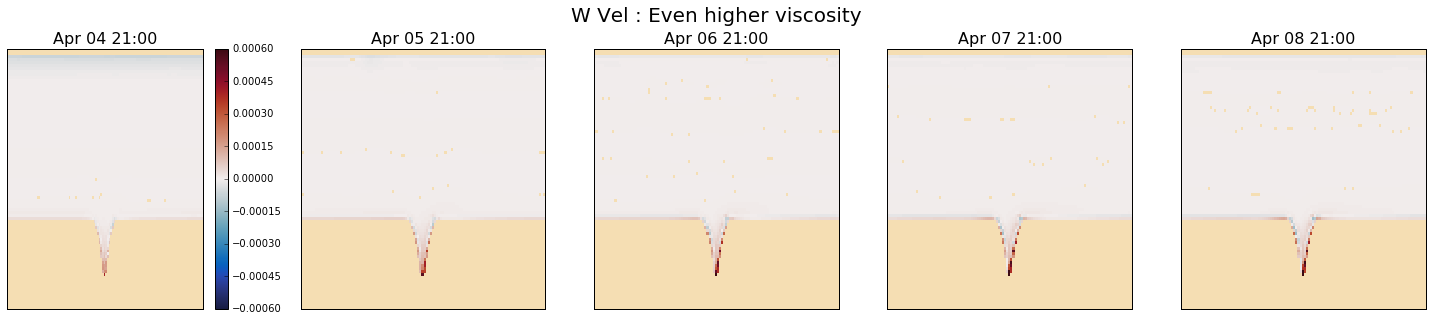

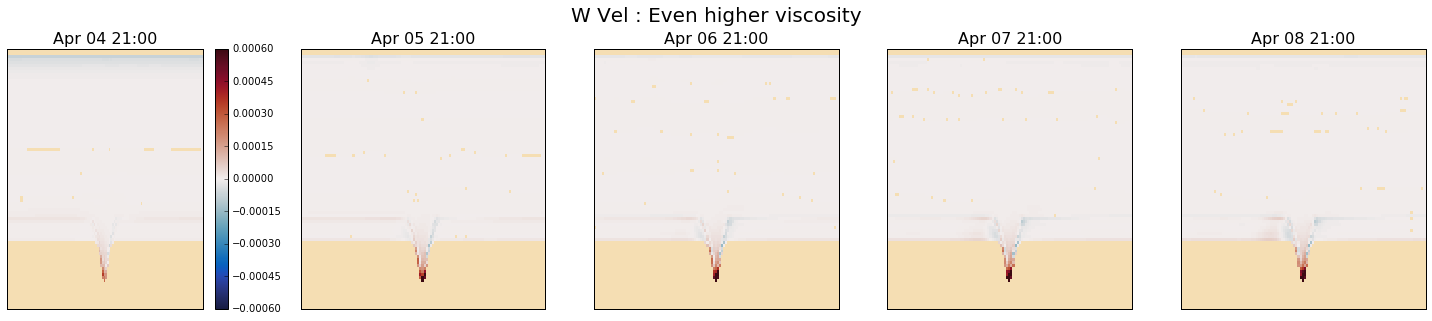

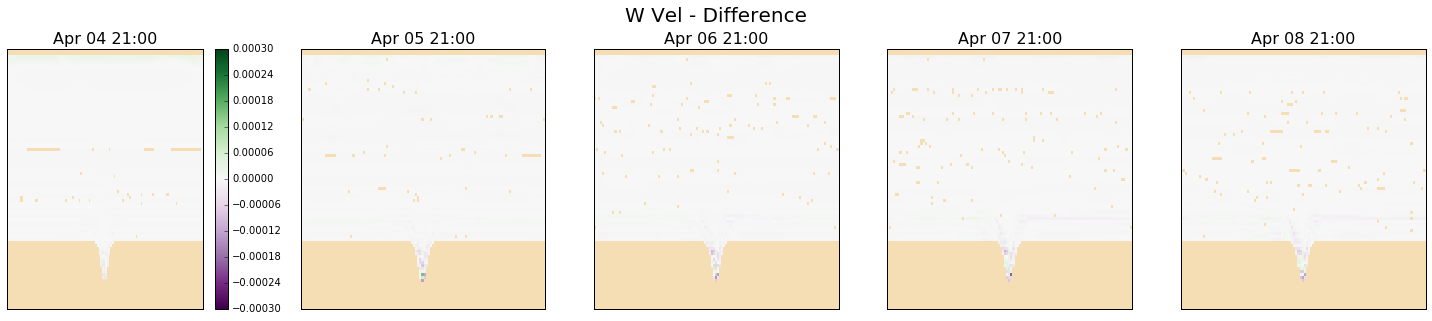

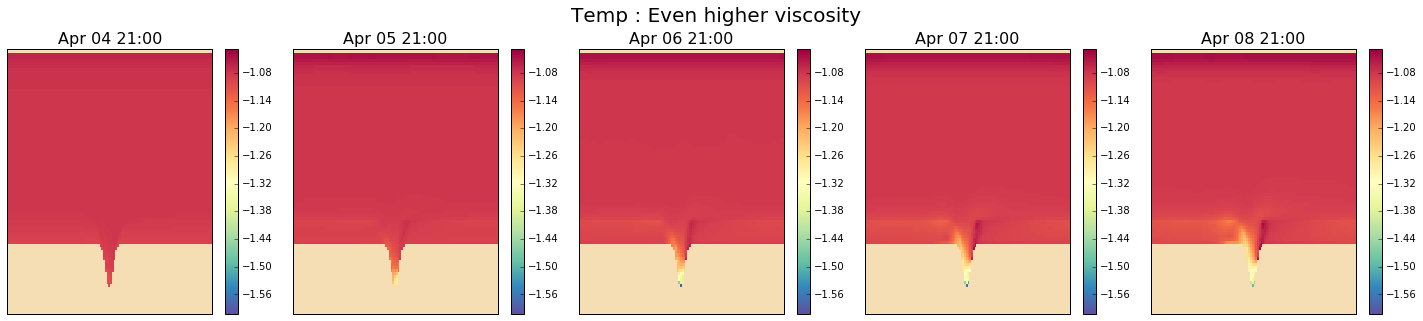

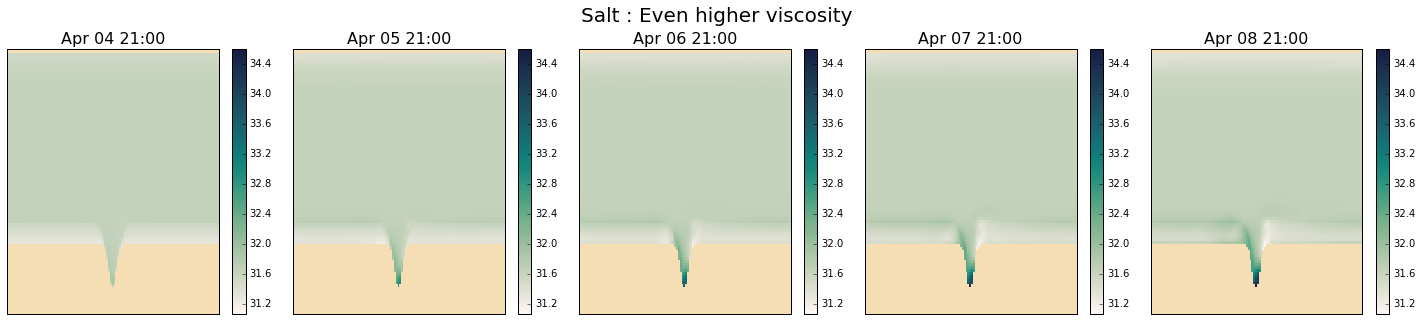

In [18]:
dep = 6; supttl = ' : Even higher viscosity'; dttl = ' - Difference'
print(gridT_22['deptht'][:][dep], gridT_22['deptht'][:][8])
time_inds = [3,7,11,15,19]
fig = plot_gyre_times(gridT_22, U_22, 8, time_inds, 0.25, cmo.cm.balance, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_22, U_22, dep, time_inds, 0.25, cmo.cm.balance, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_22, ab_sub(U_22,U_20), dep, time_inds, 0.1, cm.PRGn, True, 'U Vel'+dttl)

fig = plot_gyre_times(gridT_22, V_22, 8, time_inds, 0.25, cmo.cm.balance, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_22, V_22, dep, time_inds, 0.20, cmo.cm.balance, True, 'V Vel'+supttl)
fig = plot_gyre_times(gridT_22, ab_sub(V_22,V_20), dep, time_inds, 0.1, cm.PRGn, True, 'V Vel'+dttl)

fig = plot_gyre_times(gridT_22, W_22, 8, time_inds, 0.0006, cmo.cm.balance, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_22, W_22, dep, time_inds, 0.0006, cmo.cm.balance, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_22, ab_sub(W_22,W_20), dep, time_inds, 0.0003, cm.PRGn, True, 'W Vel'+dttl)

fig = plot_gyre_times(gridT_22, tem_22, dep, time_inds, None, cm.Spectral_r, 'tem', 'Temp'+supttl)
fig = plot_gyre_times(gridT_22, sal_22, dep, time_inds, None, cmo.cm.tempo, 'sal', 'Salt'+supttl)

74.9393


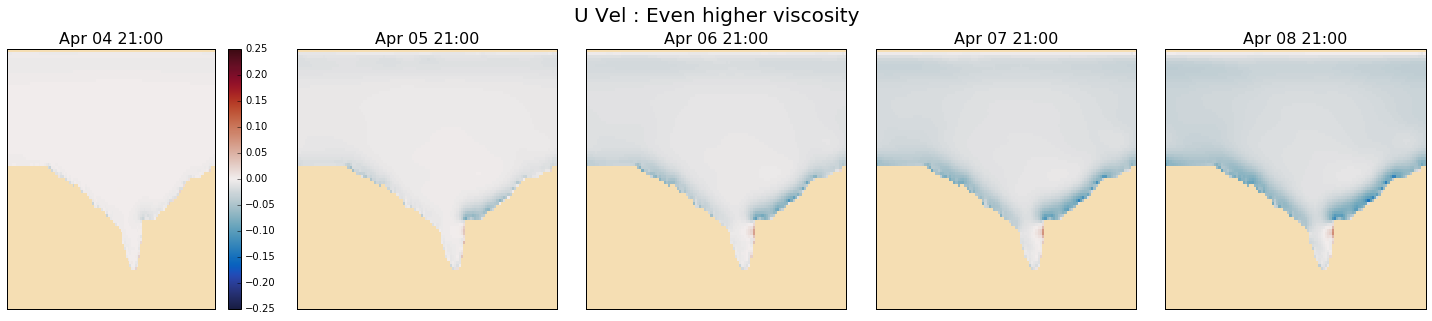

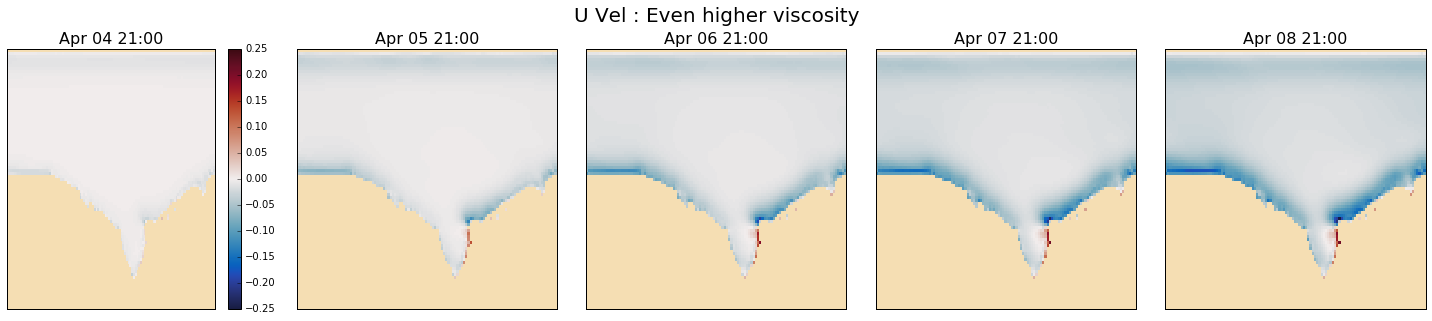

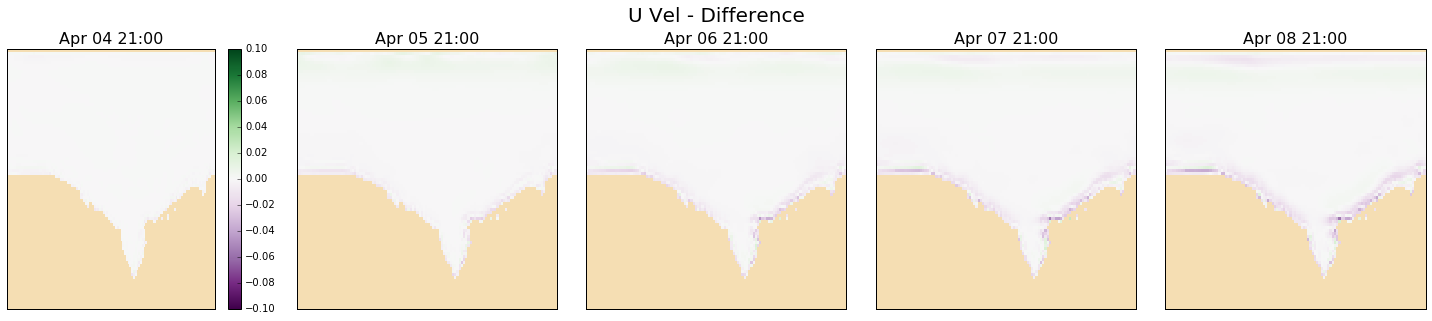

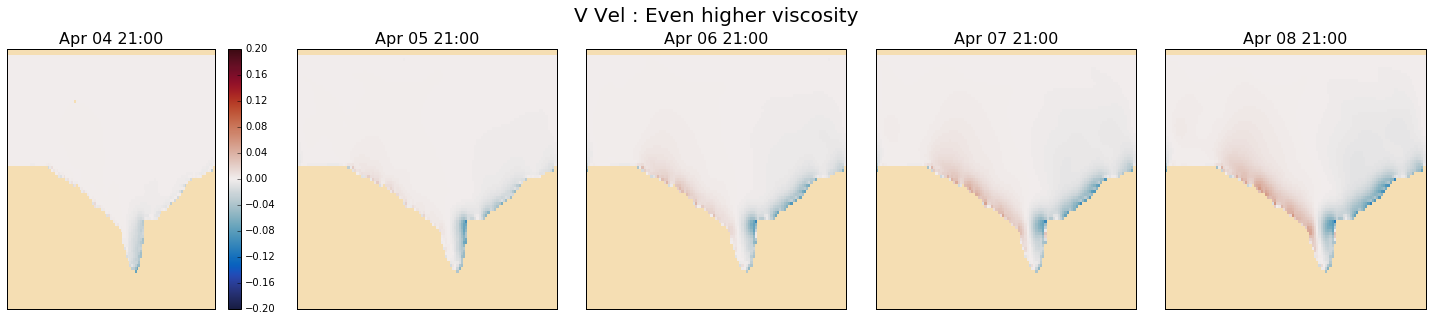

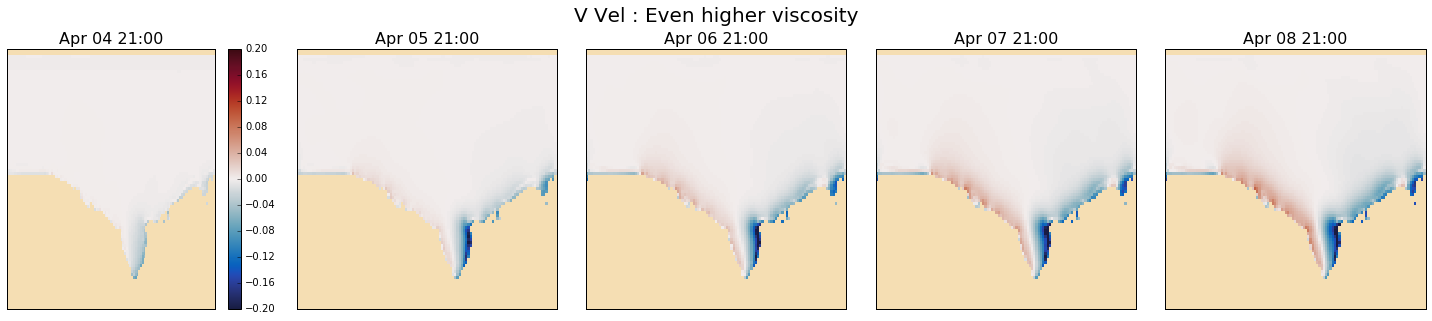

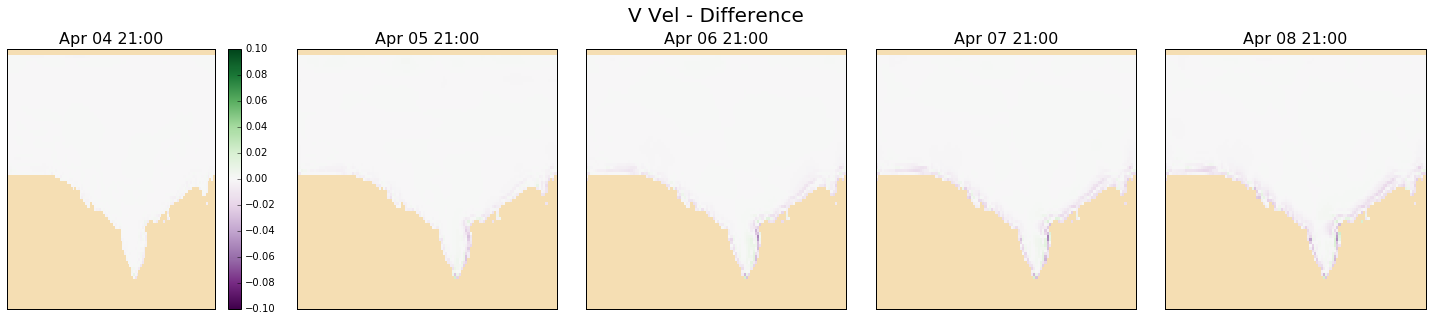

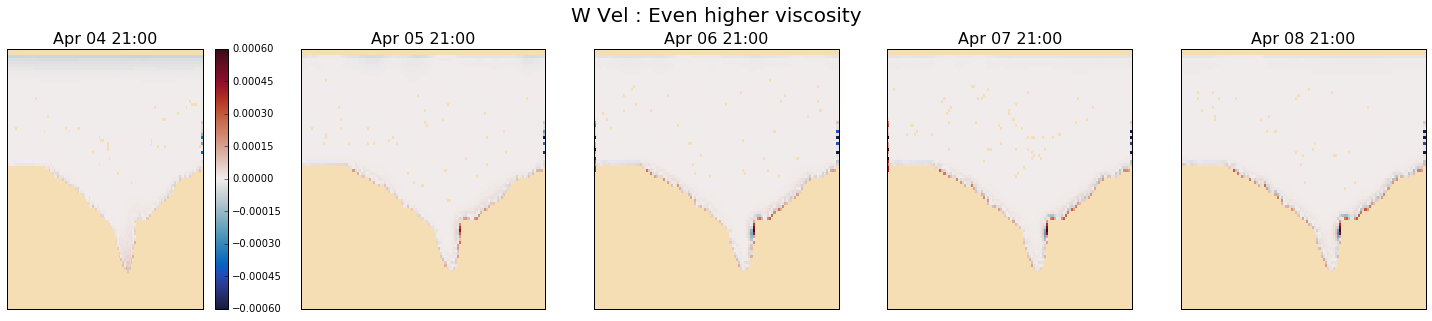

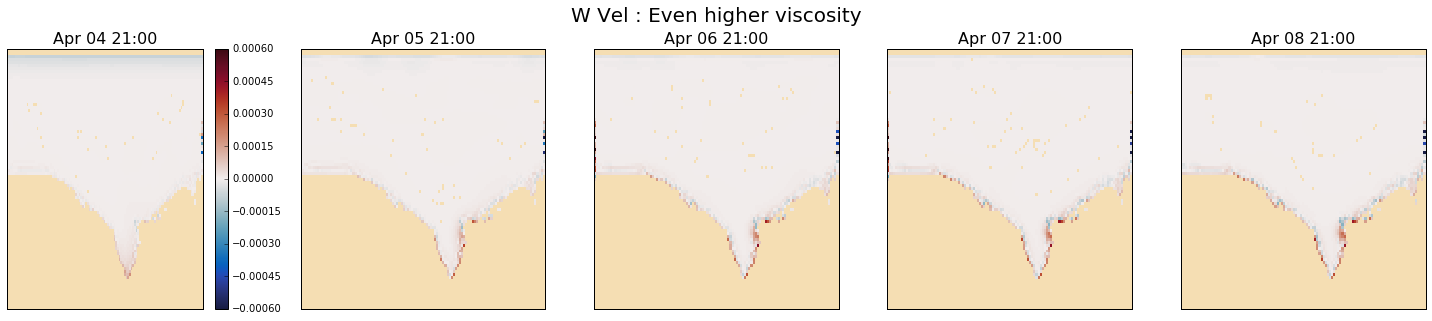

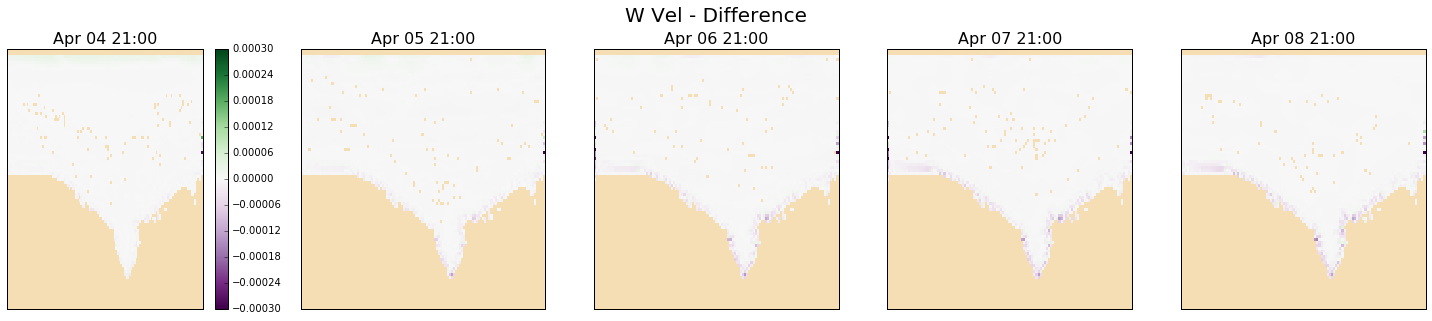

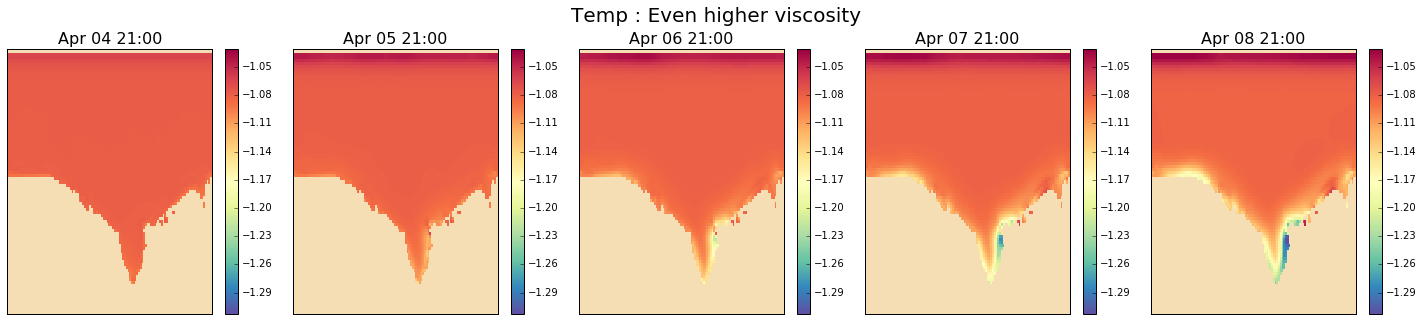

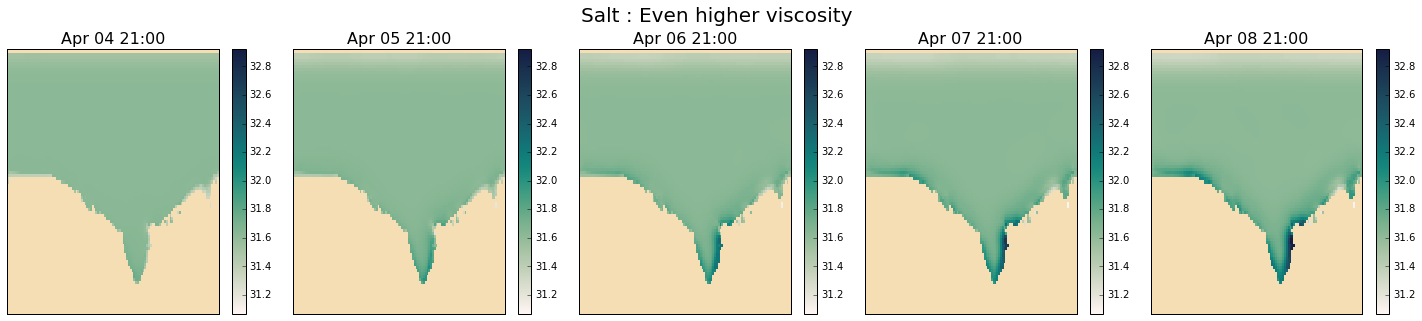

In [19]:
dep = 6; supttl = ' : Even higher viscosity'; dttl = ' - Difference'
print(gridT_23['deptht'][:][dep])
time_inds = [3,7,11,15,19]
fig = plot_gyre_times(gridT_23, U_23, 8, time_inds, 0.25, cmo.cm.balance, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_23, U_23, dep, time_inds, 0.25, cmo.cm.balance, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_23, ab_sub(U_23,U_21), dep, time_inds, 0.1, cm.PRGn, True, 'U Vel'+dttl)

fig = plot_gyre_times(gridT_23, V_23, 8, time_inds, 0.20, cmo.cm.balance, True, 'V Vel'+supttl)
fig = plot_gyre_times(gridT_23, V_23, dep, time_inds, 0.20, cmo.cm.balance, True, 'V Vel'+supttl)
fig = plot_gyre_times(gridT_23, ab_sub(V_23,V_21), dep, time_inds, 0.1, cm.PRGn, True, 'V Vel'+dttl)

fig = plot_gyre_times(gridT_23, W_23, 8, time_inds, 0.0006, cmo.cm.balance, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_23, W_23, dep, time_inds, 0.0006, cmo.cm.balance, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_23, ab_sub(W_23,W_21), dep, time_inds, 0.0003, cm.PRGn, True, 'W Vel'+dttl)

fig = plot_gyre_times(gridT_23, tem_23, dep, time_inds, None, cm.Spectral_r, 'tem', 'Temp'+supttl)
fig = plot_gyre_times(gridT_23, sal_23, dep, time_inds, None, cmo.cm.tempo, 'sal', 'Salt'+supttl)

# Run24 (Ideal): TEOS-10

74.9393


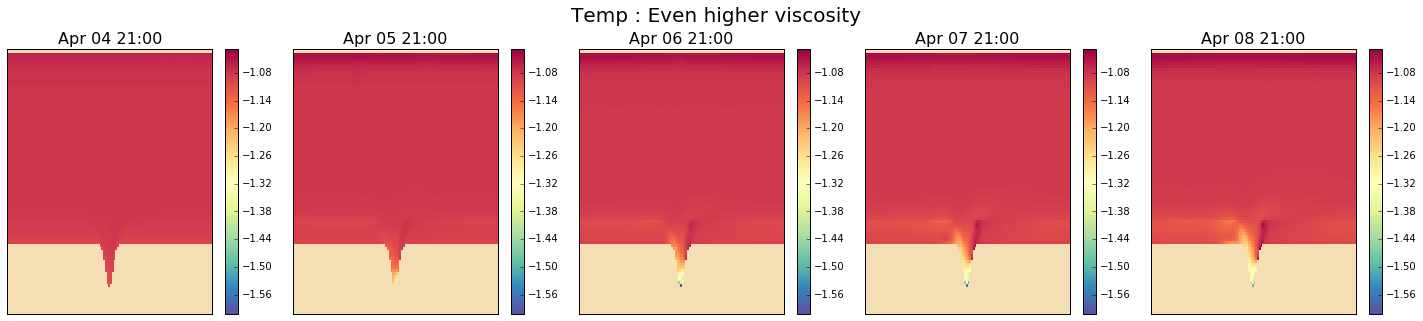

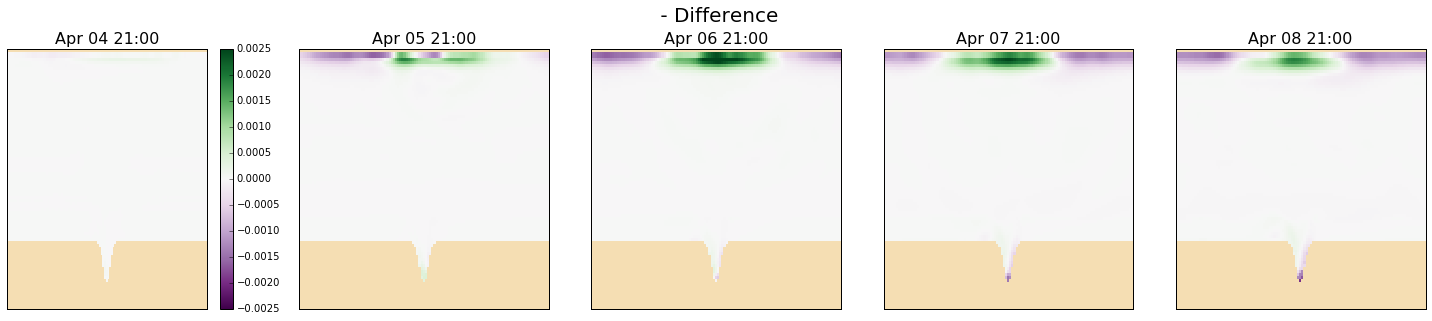

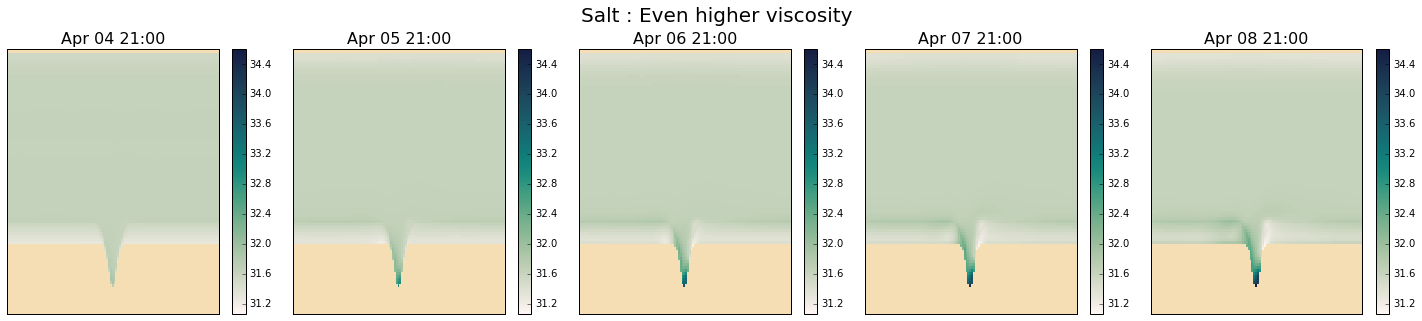

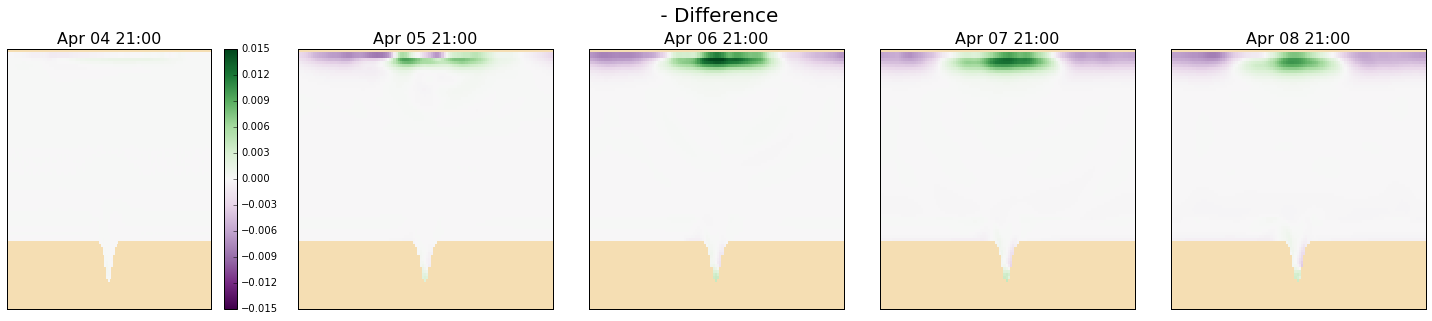

In [14]:
dep = 6; supttl = ' : Even higher viscosity'; dttl = ' - Difference'
print(gridT_24['deptht'][:][dep])
time_inds = [3,7,11,15,19]

fig = plot_gyre_times(gridT_24, tem_24, dep, time_inds, None, cm.Spectral_r, 'tem', 'Temp'+supttl)
fig = plot_gyre_times(gridT_24, ab_sub(tem_24,tem_22), dep, time_inds, 0.0025, cm.PRGn, True, dttl)
fig = plot_gyre_times(gridT_24, sal_24, dep, time_inds, None, cmo.cm.tempo, 'sal', 'Salt'+supttl)
fig = plot_gyre_times(gridT_24, ab_sub(sal_24,sal_22), dep, time_inds, 0.015, cm.PRGn, True, dttl)